# \[TS\] CH02. 실습2(추세모형)

김보람  
2023-10-02

> 해당 자료는 전북대학교 이영미 교수님 2023고급시계열분석 자료임

# 패키지 설치

In [22]:
############## package
library(lmtest) ##DW test
library(ggplot2)
library(lubridate)
library(gridExtra)


In [23]:
options(repr.plot.width = 15, repr.plot.height = 8)


# 삼각함수 그려보기

`-` $sin(x)$: 주기가 2$\pi$인 주기 함수

In [26]:
x <- seq(0,48,0.01)


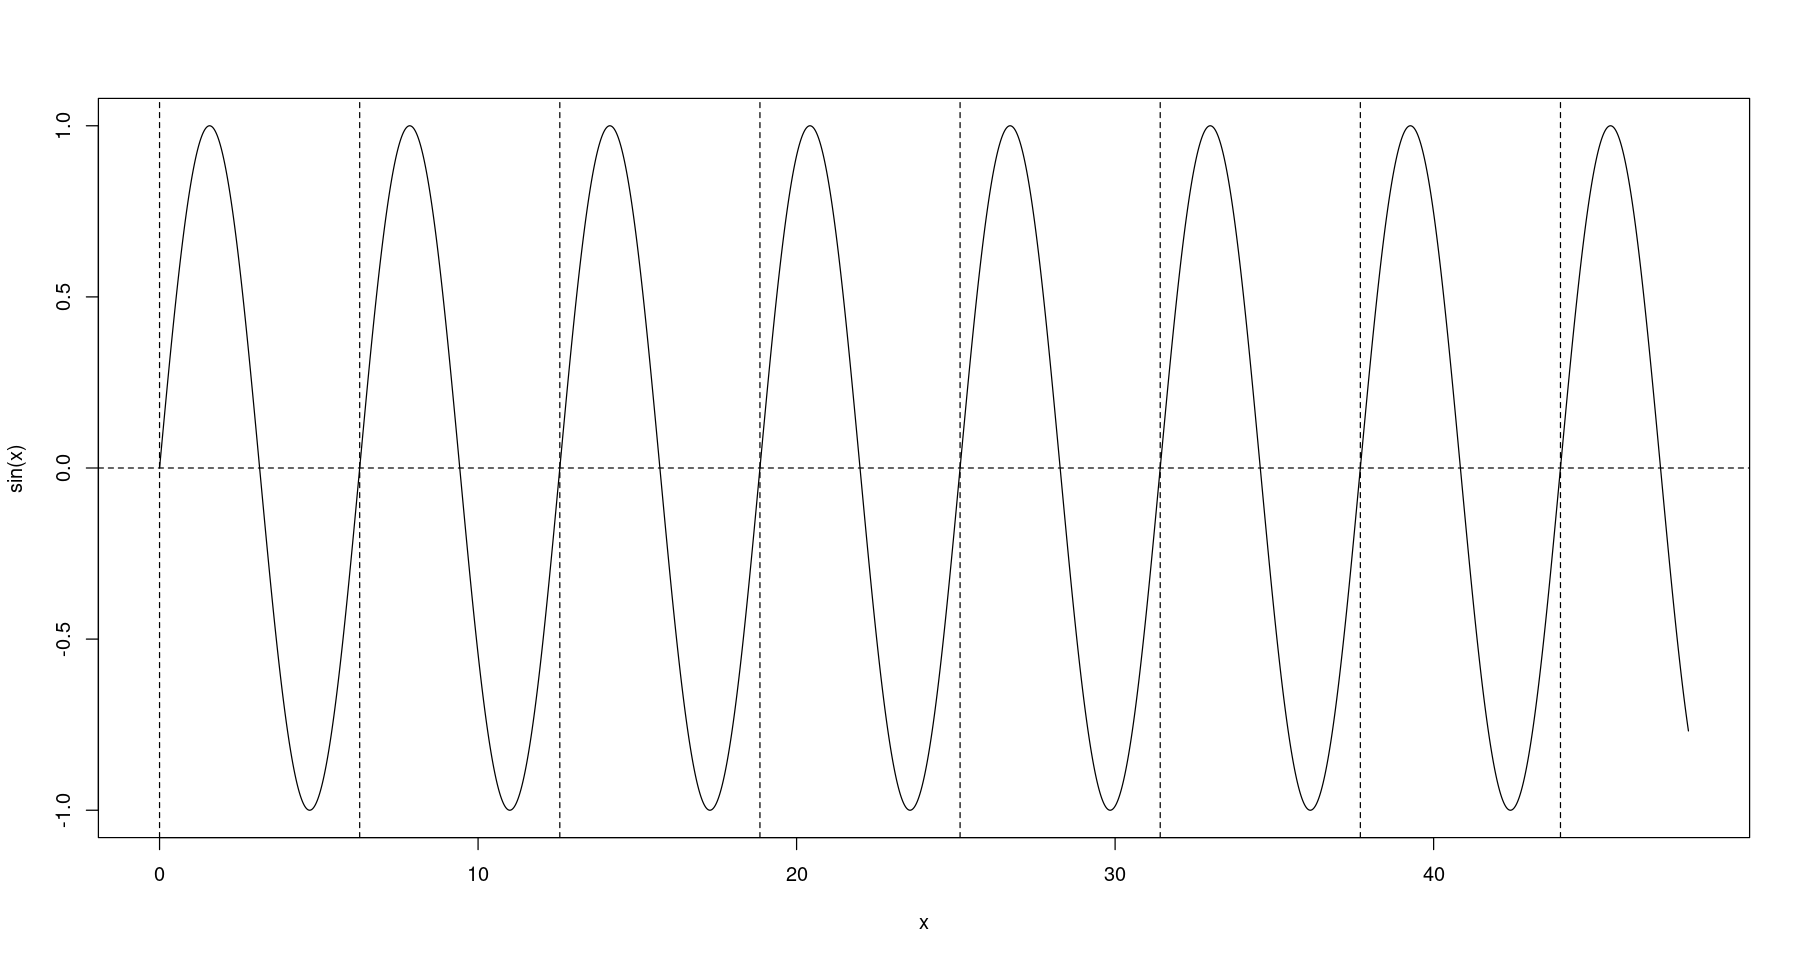

In [27]:
plot(x, sin(x), type='l')
abline(h=0, lty=2)
abline(v=seq(0,48, by = 2*pi), lty=2)

`-` $cos(x)$: 주기가 2$\pi$인 주기 함수

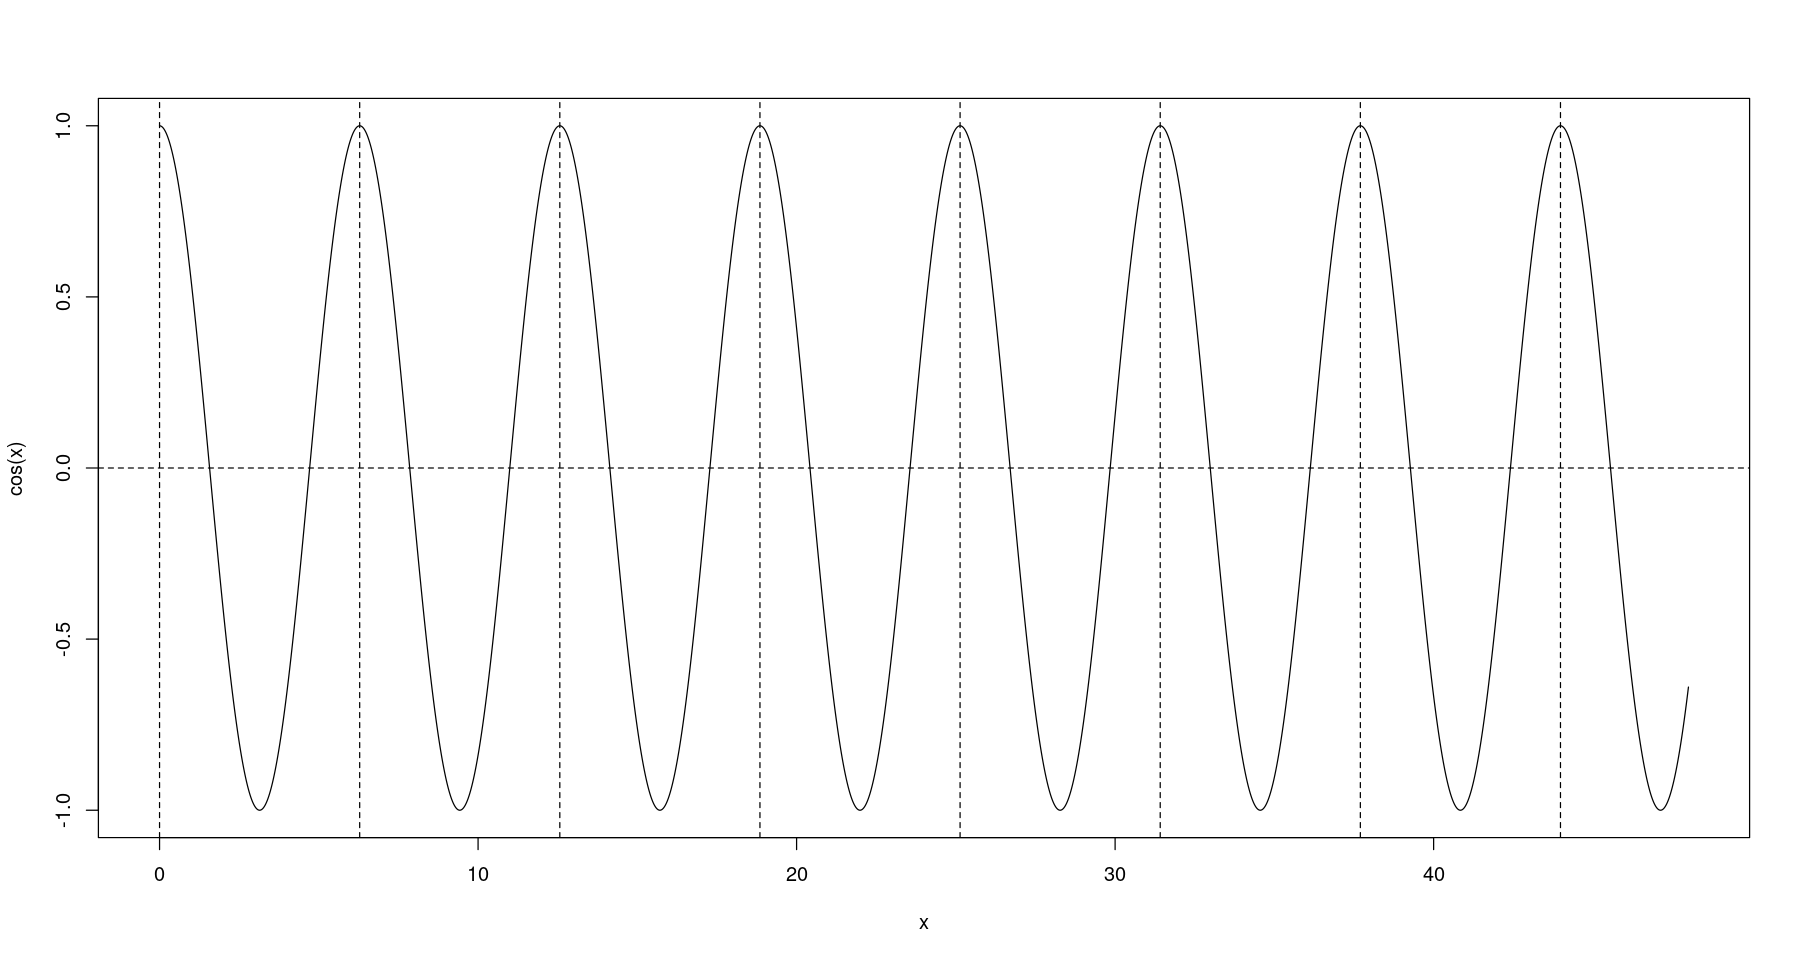

In [28]:
plot(x, cos(x), type='l')
abline(h=0, lty=2)
abline(v=seq(0,48, by = 2*pi), lty=2)


`-` 정리..

-   sin(x): 주기 2$\pi$
-   sin(2x): 주기 2$\pi$/2 = $\pi$
-   sin(3x): 주기 2$\pi$/3
-   sin($\pi$x): 주기 2$\pi$/$\pi$ = 2
-   sin($\pi$x/6): 주기 12

주기를 s로 바꾸고 싶다면, s = 2 $\pi$ / x =\> x = 2$\pi$s

`-` sin 함수의 주기 변동

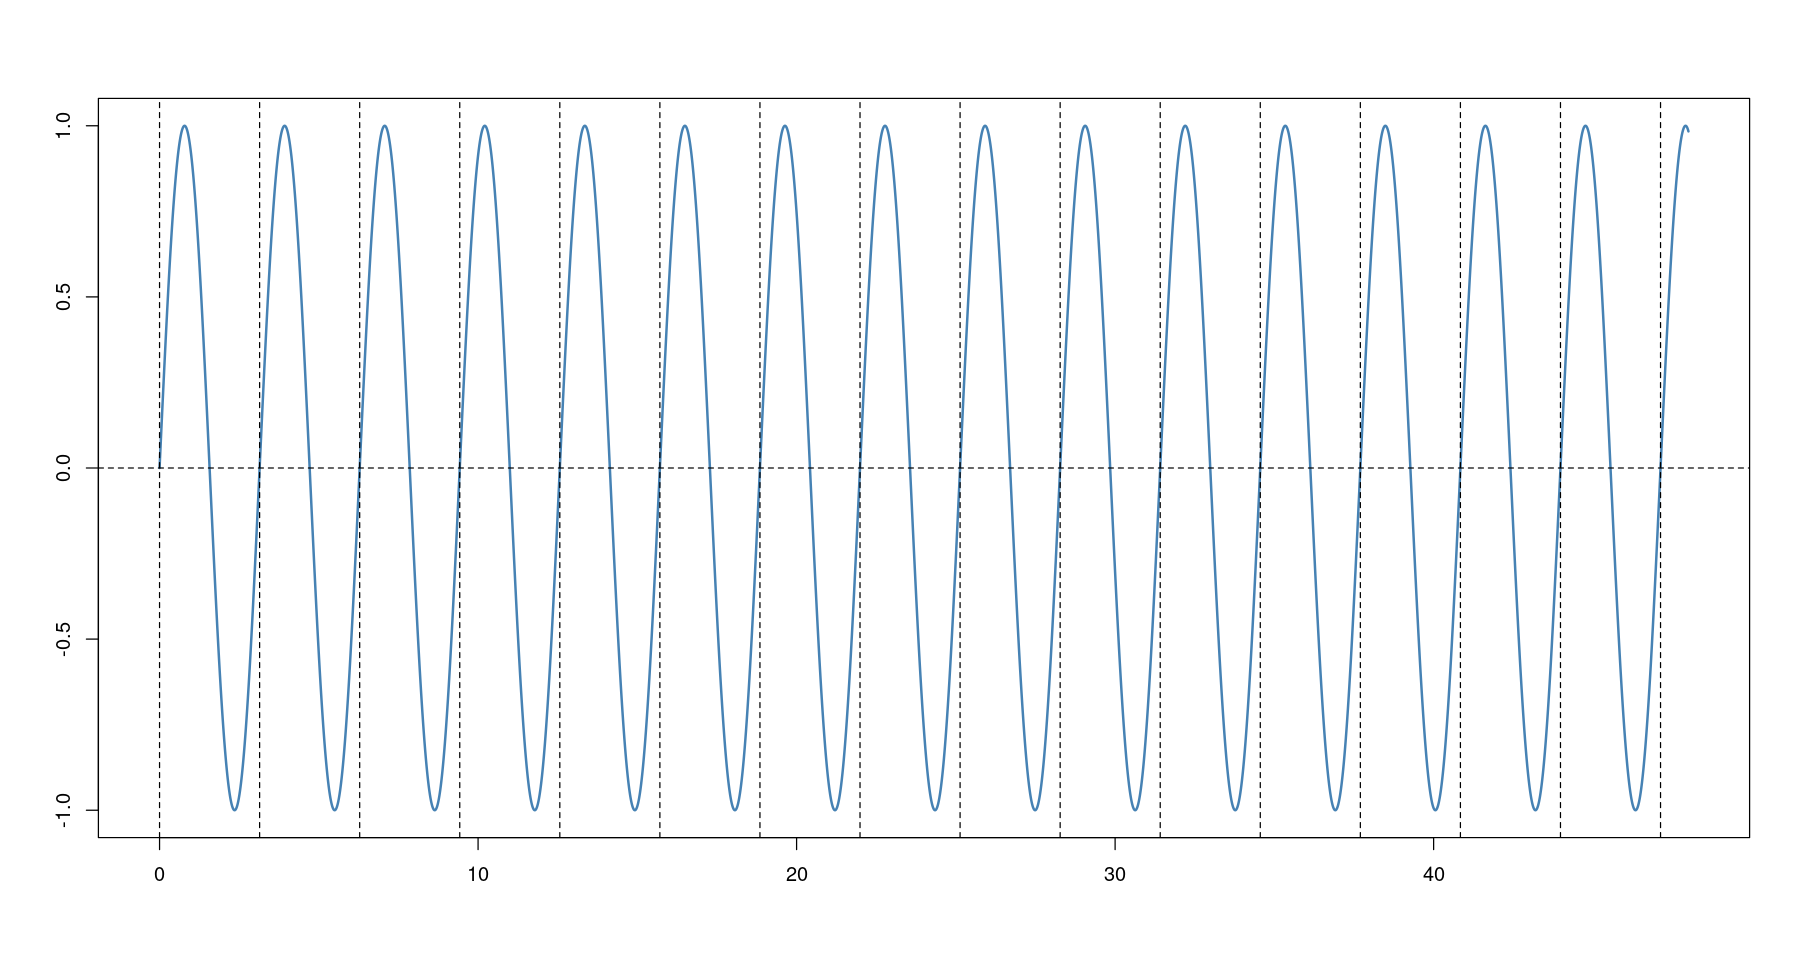

In [6]:
# 주기 = pi
plot(x, sin(2*x), type='l', col='steelblue', lwd=2,
 xlab="", ylab="")
abline(h=0, lty=2)
abline(v= seq(0, 48, by=pi), lty=2)


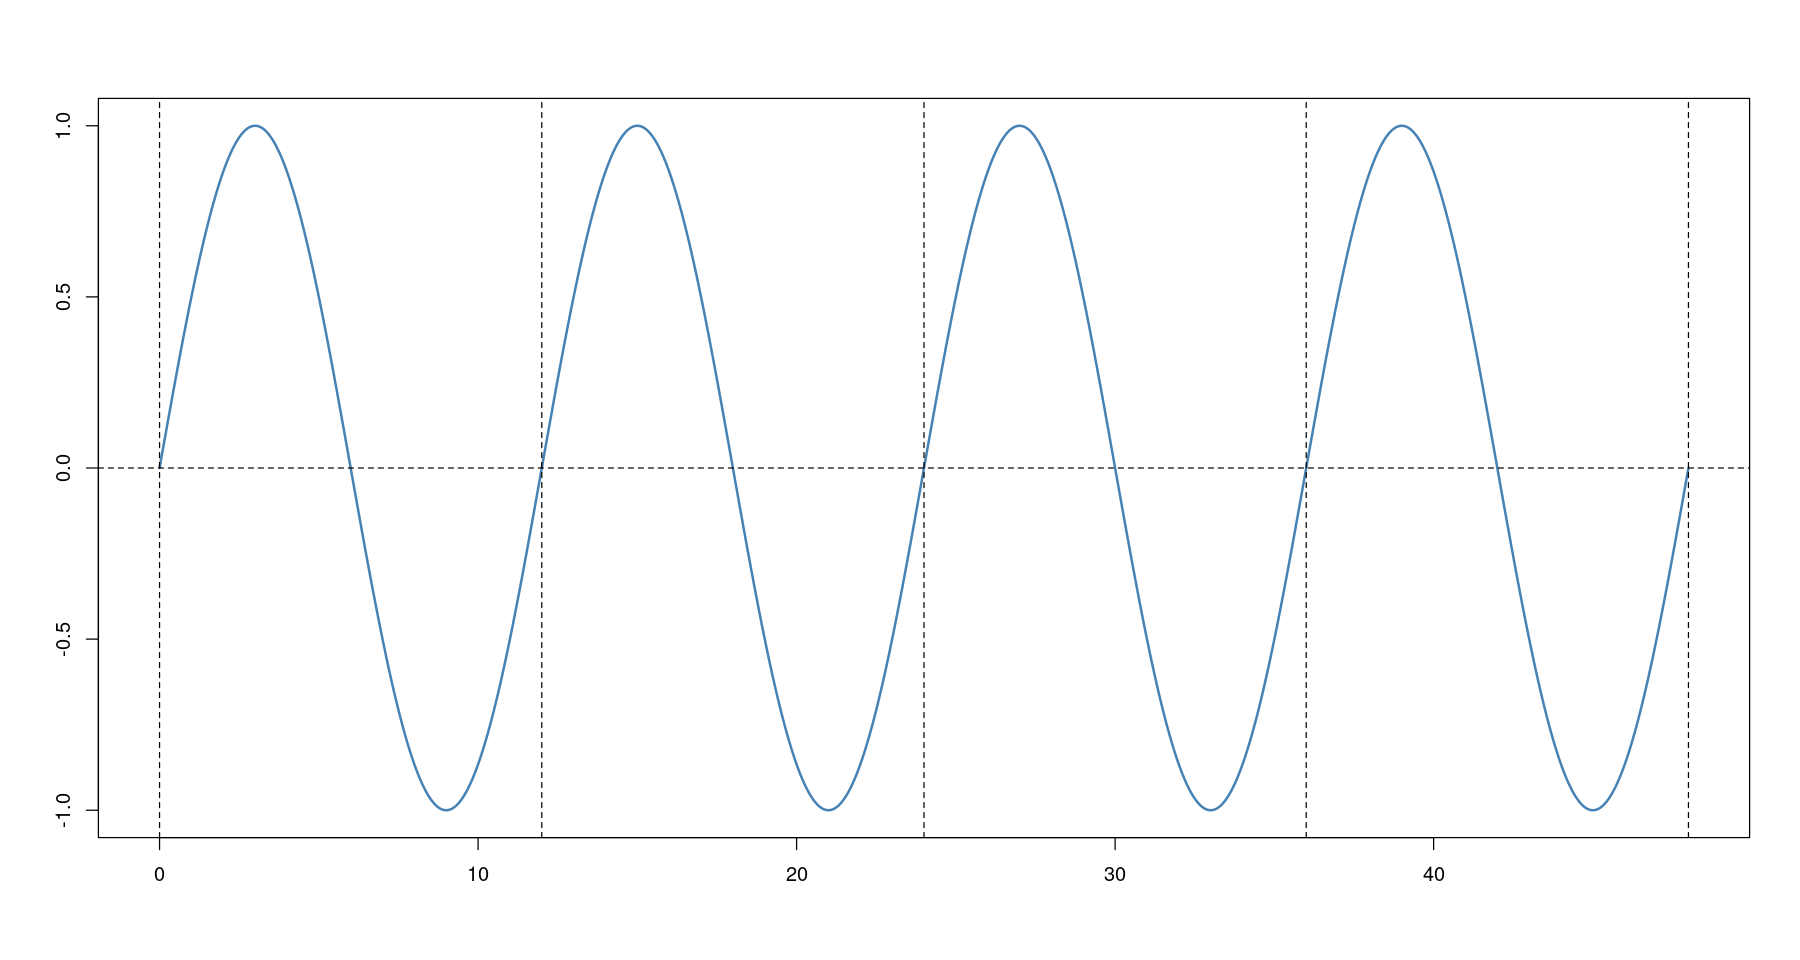

In [7]:
# 주기 = 12
s <- 12
plot(x, sin(2*pi*x/s), type='l', col='steelblue', lwd=2,
 xlab="", ylab="")
abline(h=0, lty=2)
abline(v= seq(0, 48, by=s), lty=2)

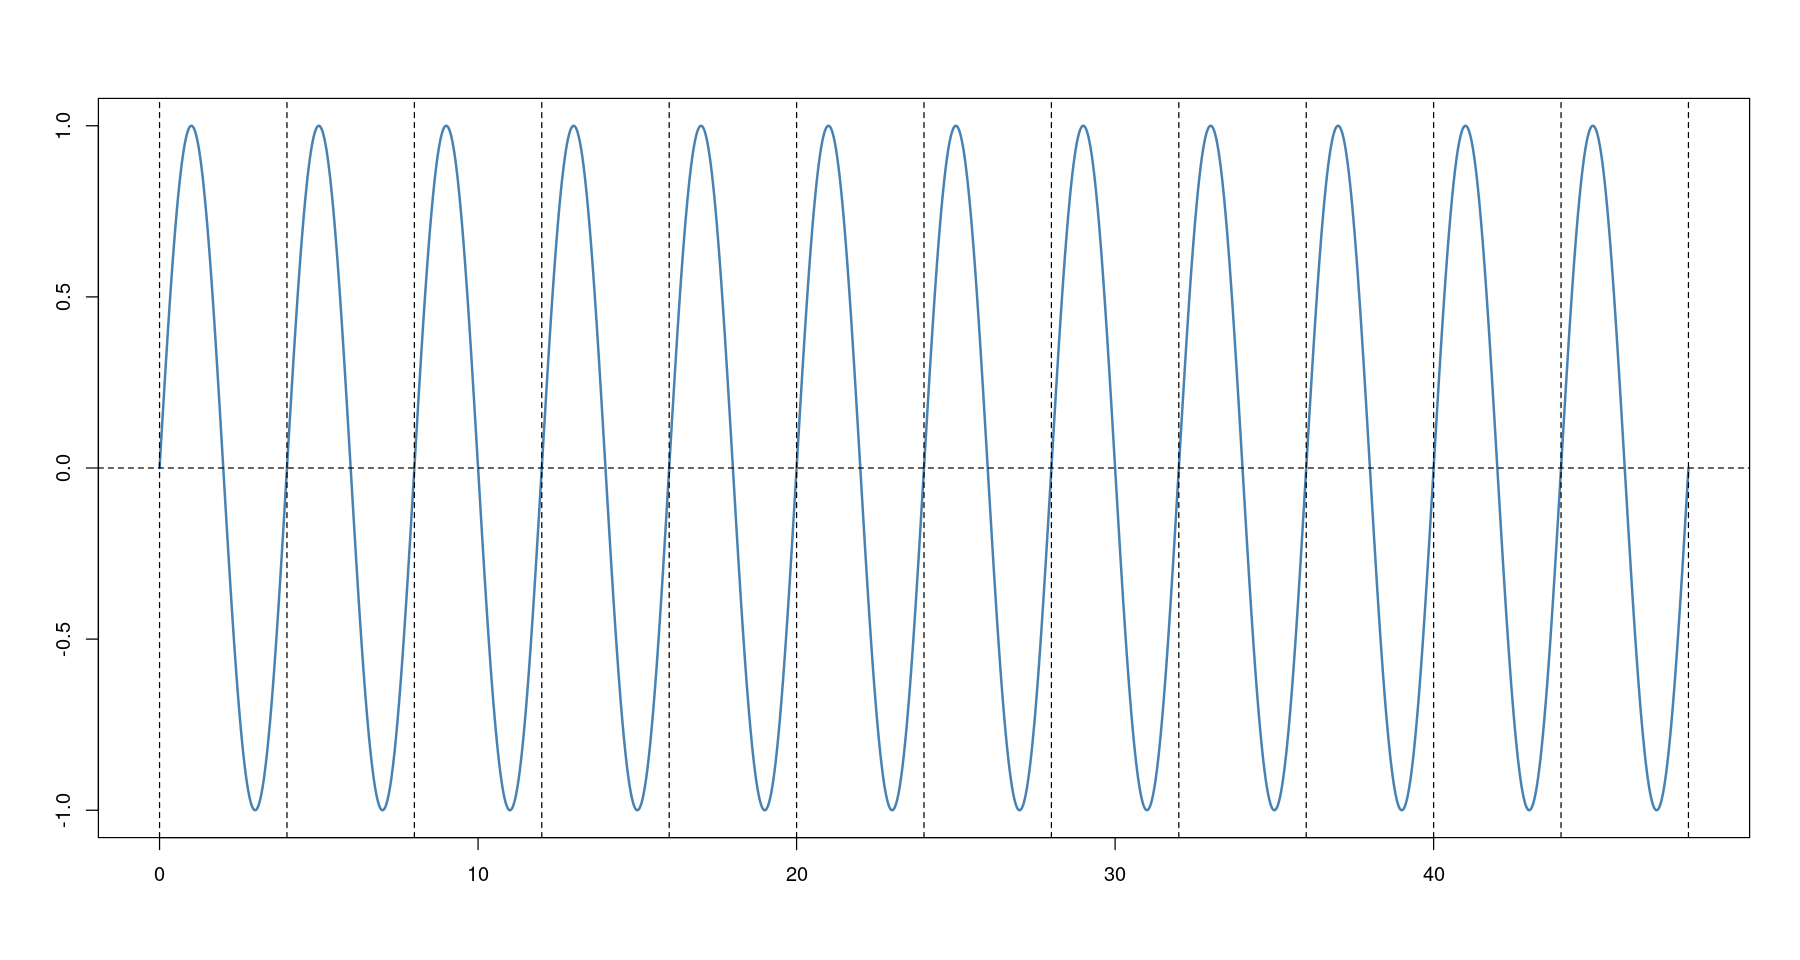

In [8]:
# 주기 = 4
s <- 4
plot(x, sin(2*pi*x/s), type='l', col='steelblue', lwd=2,
 xlab="", ylab="")
abline(h=0, lty=2)
abline(v= seq(0, 48, by=s), lty=2)


`-` sin + cos

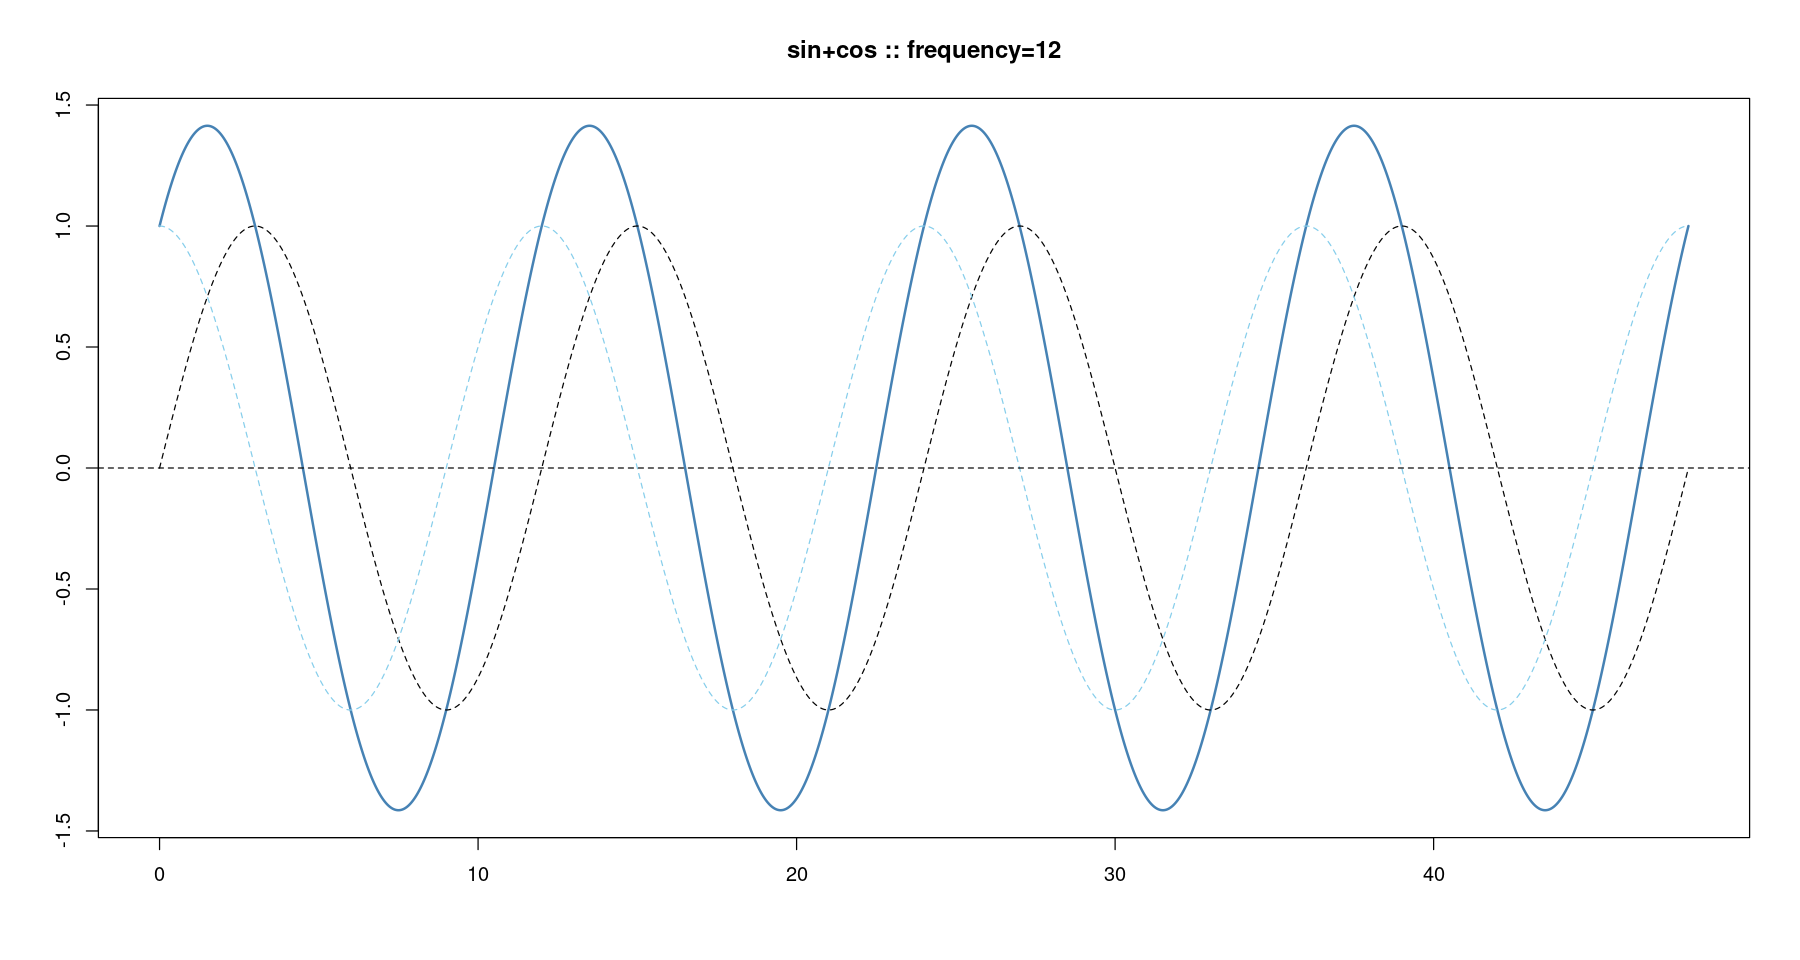

In [9]:
s <- 12
plot(x, sin(2*pi*x/s)+cos(2*pi*x/s), type='l', col='steelblue', lwd=2,
 xlab="", ylab="", main=paste0('sin+cos :: ', "frequency=", s))
lines(x, sin(2*pi*x/s), col='grey1', lty=2)
lines(x, cos(2*pi*x/s), col='skyblue', lty=2)
abline(h=0, lty=2)
#abline(v= seq(0, 48, by=s), lty=2)
#abline(v= seq(1.5, 48, by=s), lty=2)


`-` 여러 주기의 함수 합치기

-   주기가 12, 6인 sin함수 더하기:
    sin$\left(\dfrac{2 \pi t}{12} \right)$ +
    sin$\left(\dfrac{2 \pi t}{6} \right)$

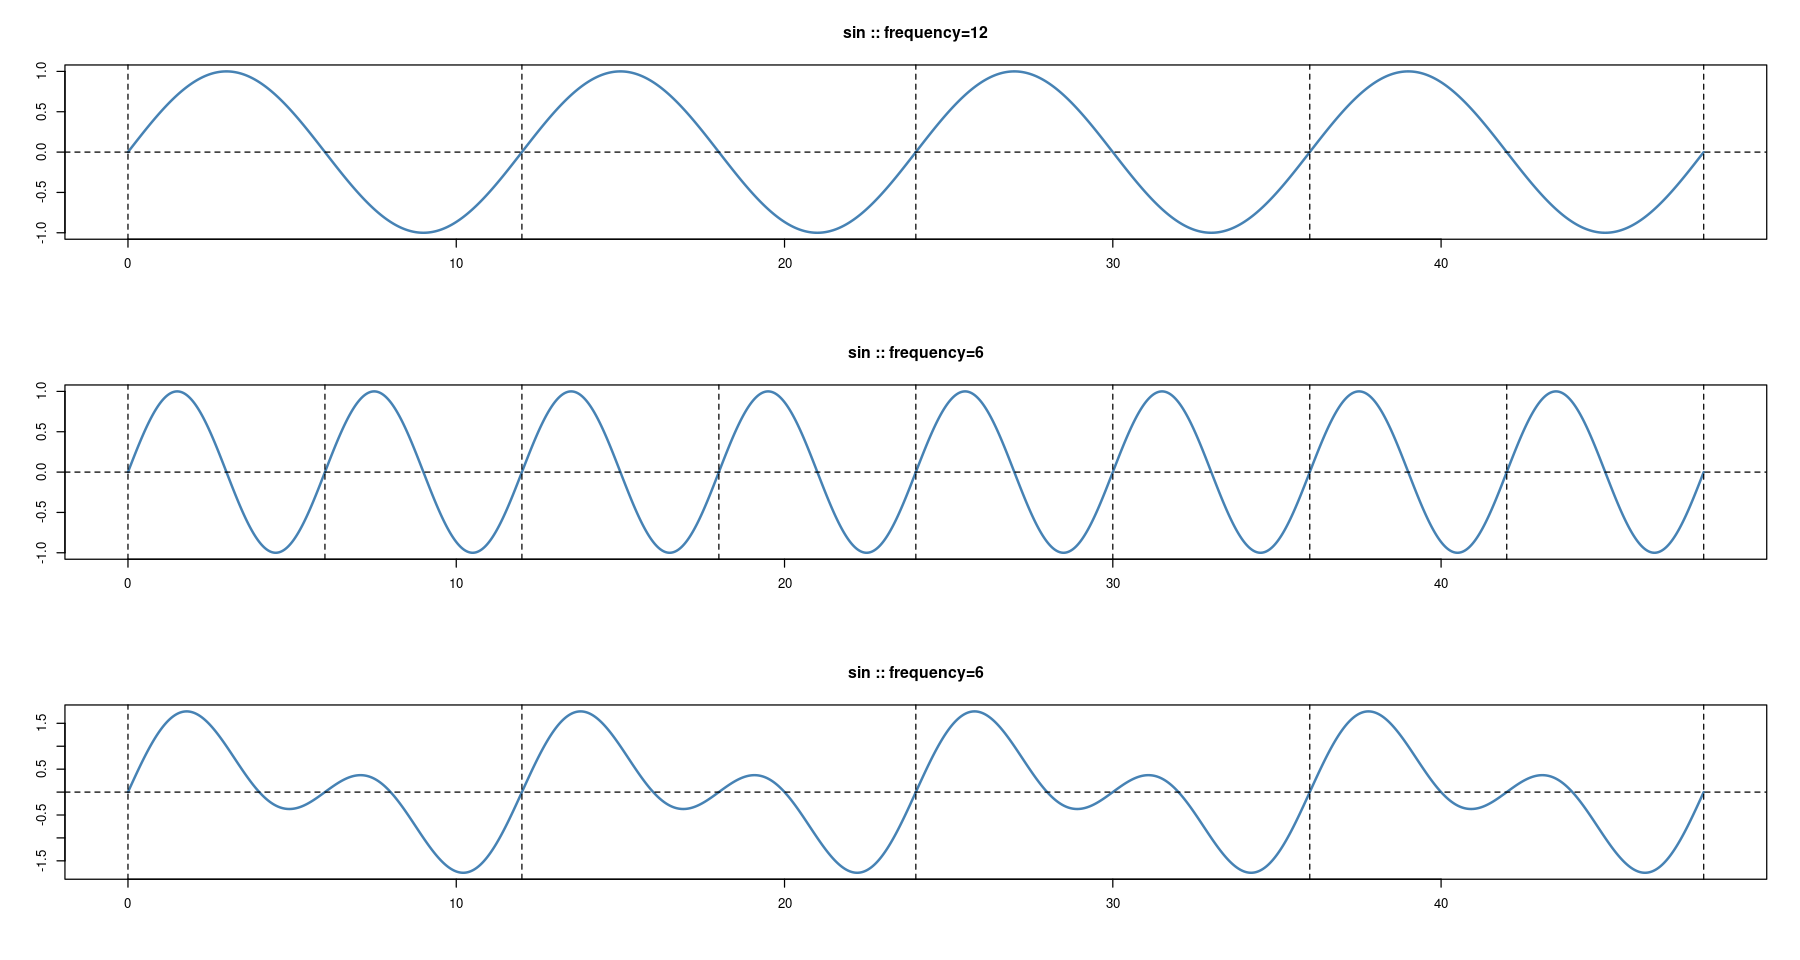

In [10]:
par(mfrow=c(3,1))
s<-12
plot(x, sin(2*pi*x/s), type='l', col='steelblue', lwd=2,
 xlab="", ylab="", main=paste0('sin :: ', "frequency=", s))
abline(h=0, lty=2)
abline(v= seq(0, 48, by=s), lty=2)
s<-6
plot(x, sin(2*pi*x/s), type='l', col='steelblue', lwd=2,
 xlab="", ylab="", main=paste0('sin :: ', "frequency=", s))
abline(h=0, lty=2)
abline(v= seq(0, 48, by=s), lty=2)
plot(x, sin(2*pi*x/12)+sin(2*pi*x/6), type='l', col='steelblue', lwd=2,
 xlab="", ylab="", main=paste0('sin :: ', "frequency=", s))
abline(h=0, lty=2)
abline(v= seq(0, 48, by=12), lty=2)


-   주기가 12, 6인 sin함수 더하기:
    $2sin \left(\dfrac{2 \pi t}{12} \right)$ +
    $0.8sin\left(\dfrac{2 \pi t}{6} \right)$

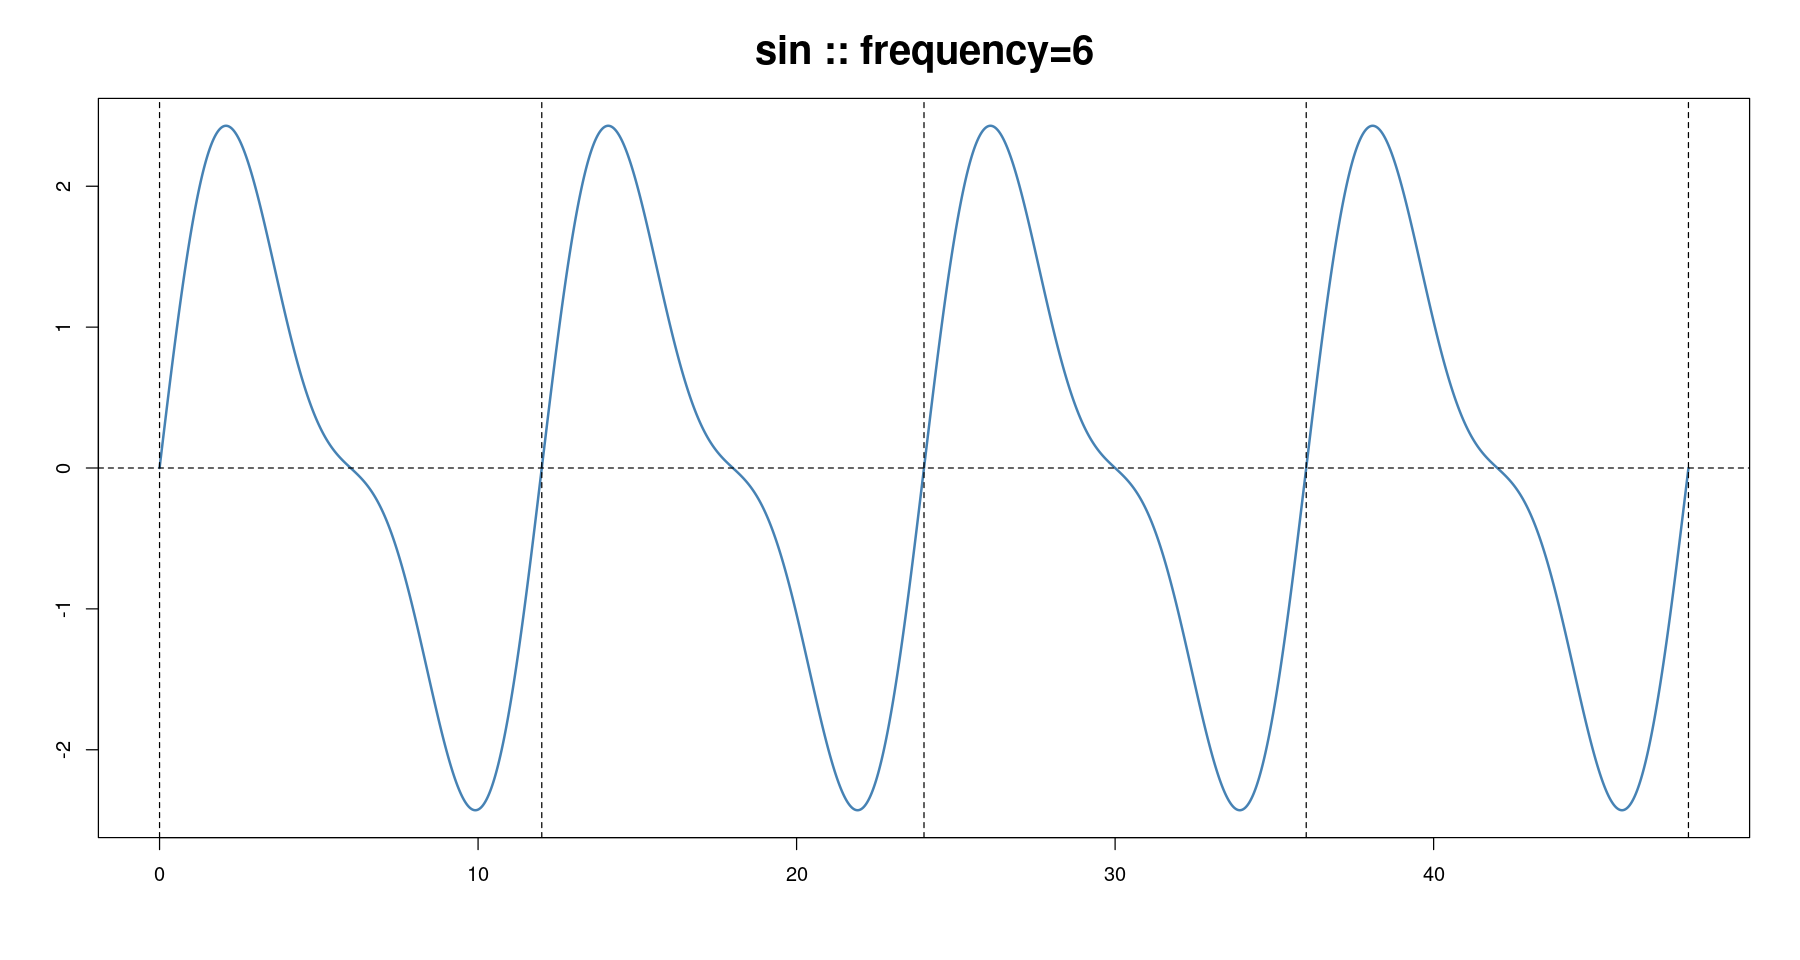

In [11]:
plot(x, 2*sin(2*pi*x/12)+0.8*sin(2*pi*x/6), type='l', col='steelblue', lwd=2,
 xlab="", ylab="", main=paste0('sin :: ', "frequency=", s),cex.main=2)
abline(h=0, lty=2)
abline(v= seq(0, 48, by=12), lty=2)


-   주기가 12, 6, 3인 sin함수 더하기:
    $sin \left(\dfrac{2 \pi t}{12} \right)$ +
    $sin\left(\dfrac{2 \pi t}{6} \right)$ +
    $sin\left(\dfrac{2 \pi t}{3} \right)$

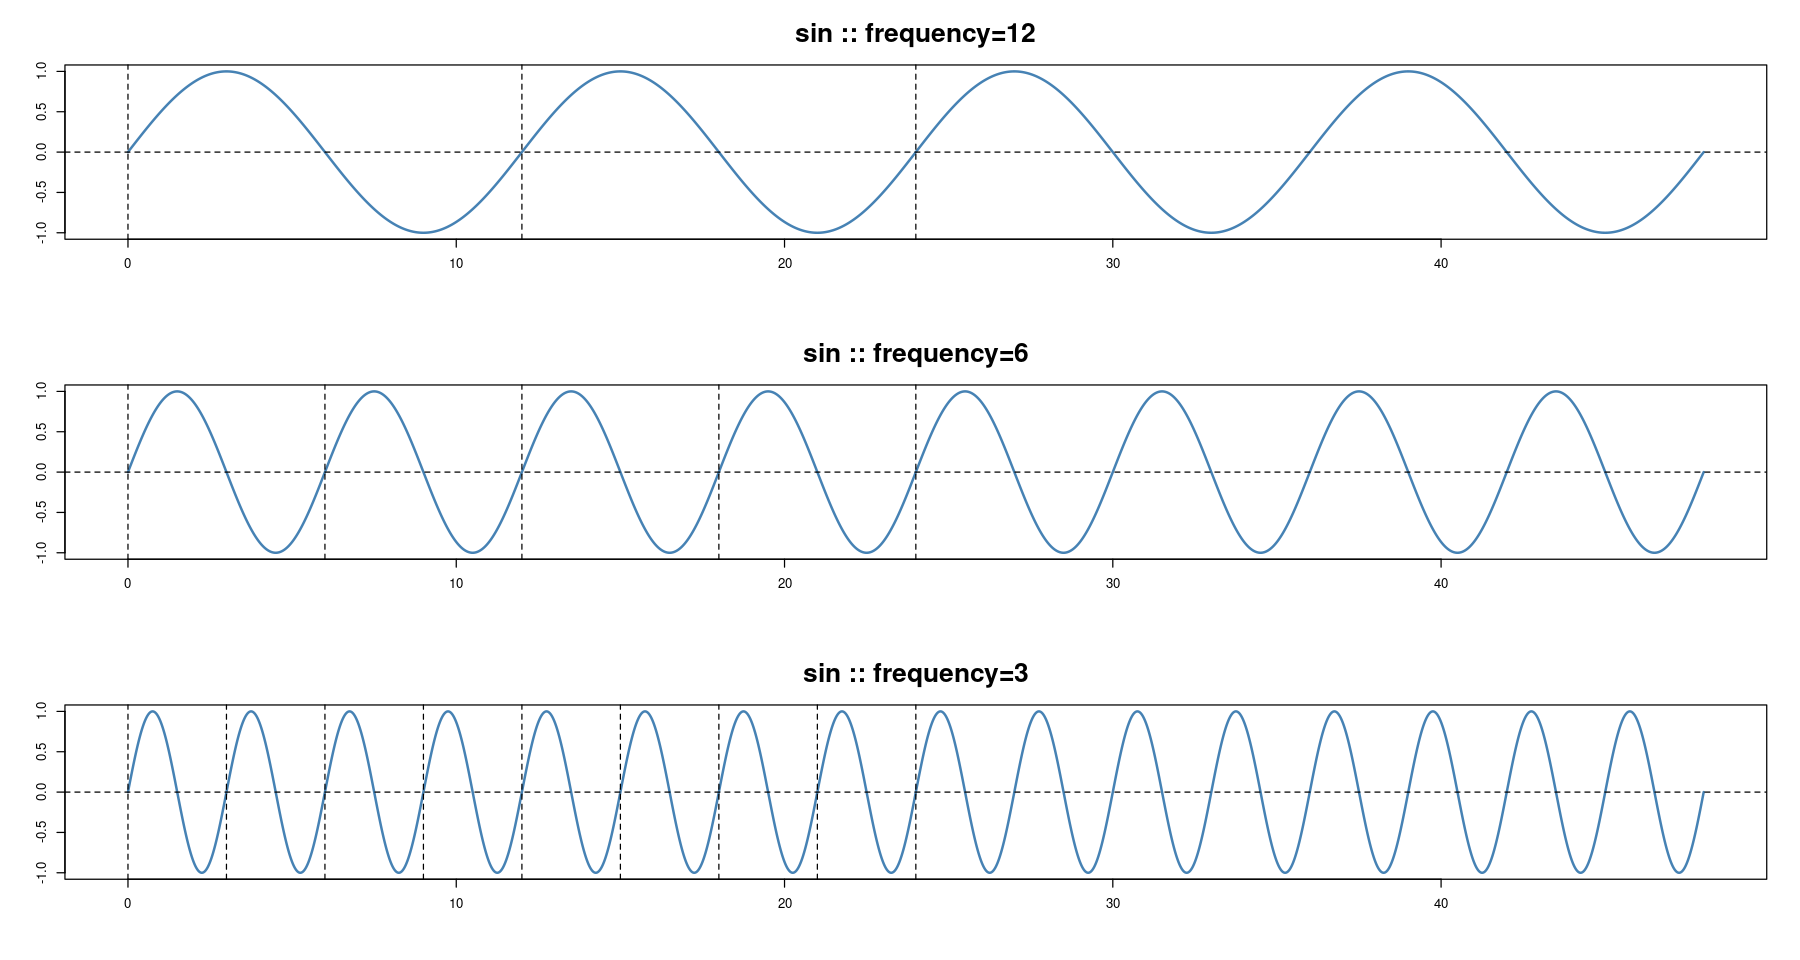

In [12]:
par(mfrow=c(3,1))
s<-12
plot(x, sin(2*pi*x/s), type='l', col='steelblue', lwd=2,
 xlab="", ylab="", main=paste0('sin :: ', "frequency=", s),cex.main=2)
abline(h=0, lty=2)
abline(v= seq(0, 24, by=s), lty=2)
s<-6
plot(x, sin(2*pi*x/s), type='l', col='steelblue', lwd=2,
 xlab="", ylab="", main=paste0('sin :: ', "frequency=", s),cex.main=2)
abline(h=0, lty=2)
abline(v= seq(0, 24, by=s), lty=2)
s<-3
plot(x, sin(2*pi*x/s), type='l', col='steelblue', lwd=2,
 xlab="", ylab="", main=paste0('sin :: ', "frequency=", s),cex.main=2)
abline(h=0, lty=2)
abline(v= seq(0, 24, by=s), lty=2)

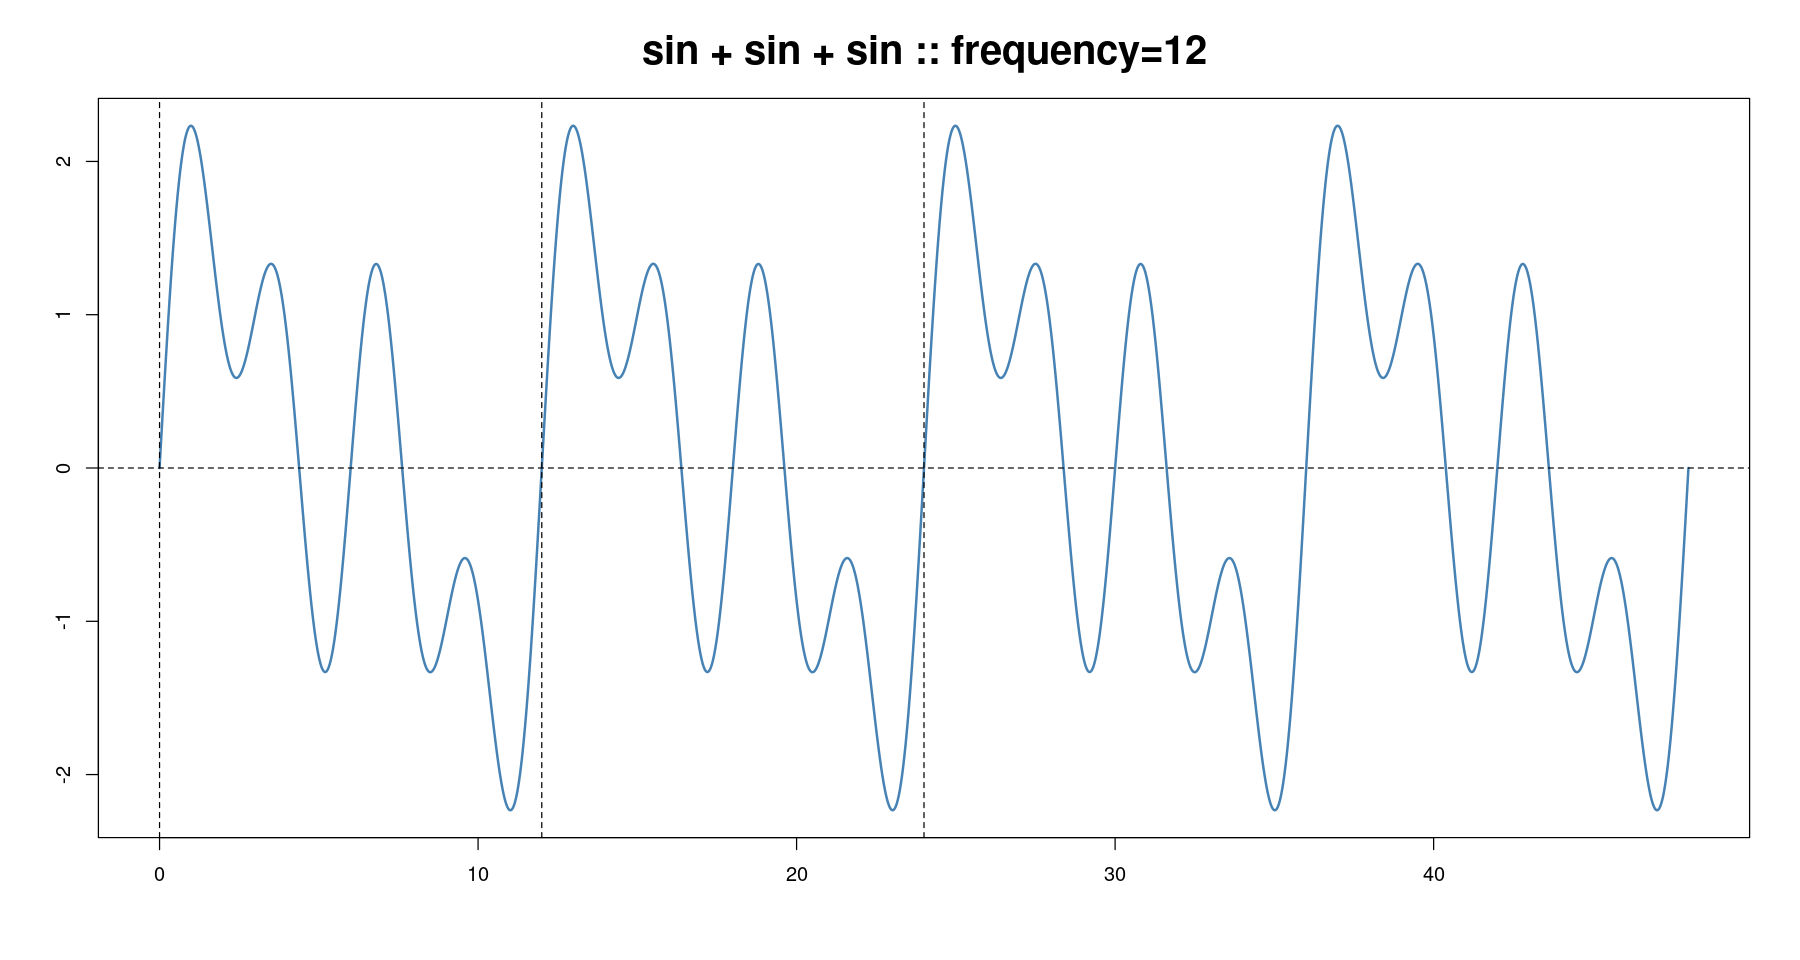

In [29]:
plot(x, sin(2*pi*x/12)+sin(2*pi*x/6)+sin(2*pi*x/3), type='l', col='steelblue', lwd=2,
 xlab="", ylab="", main=paste0('sin + sin + sin :: ', "frequency=", 12),cex.main=2)
abline(h=0, lty=2)
abline(v= seq(0, 24, by=12), lty=2)


`-` 주기와 추세가 모두 있는 경우

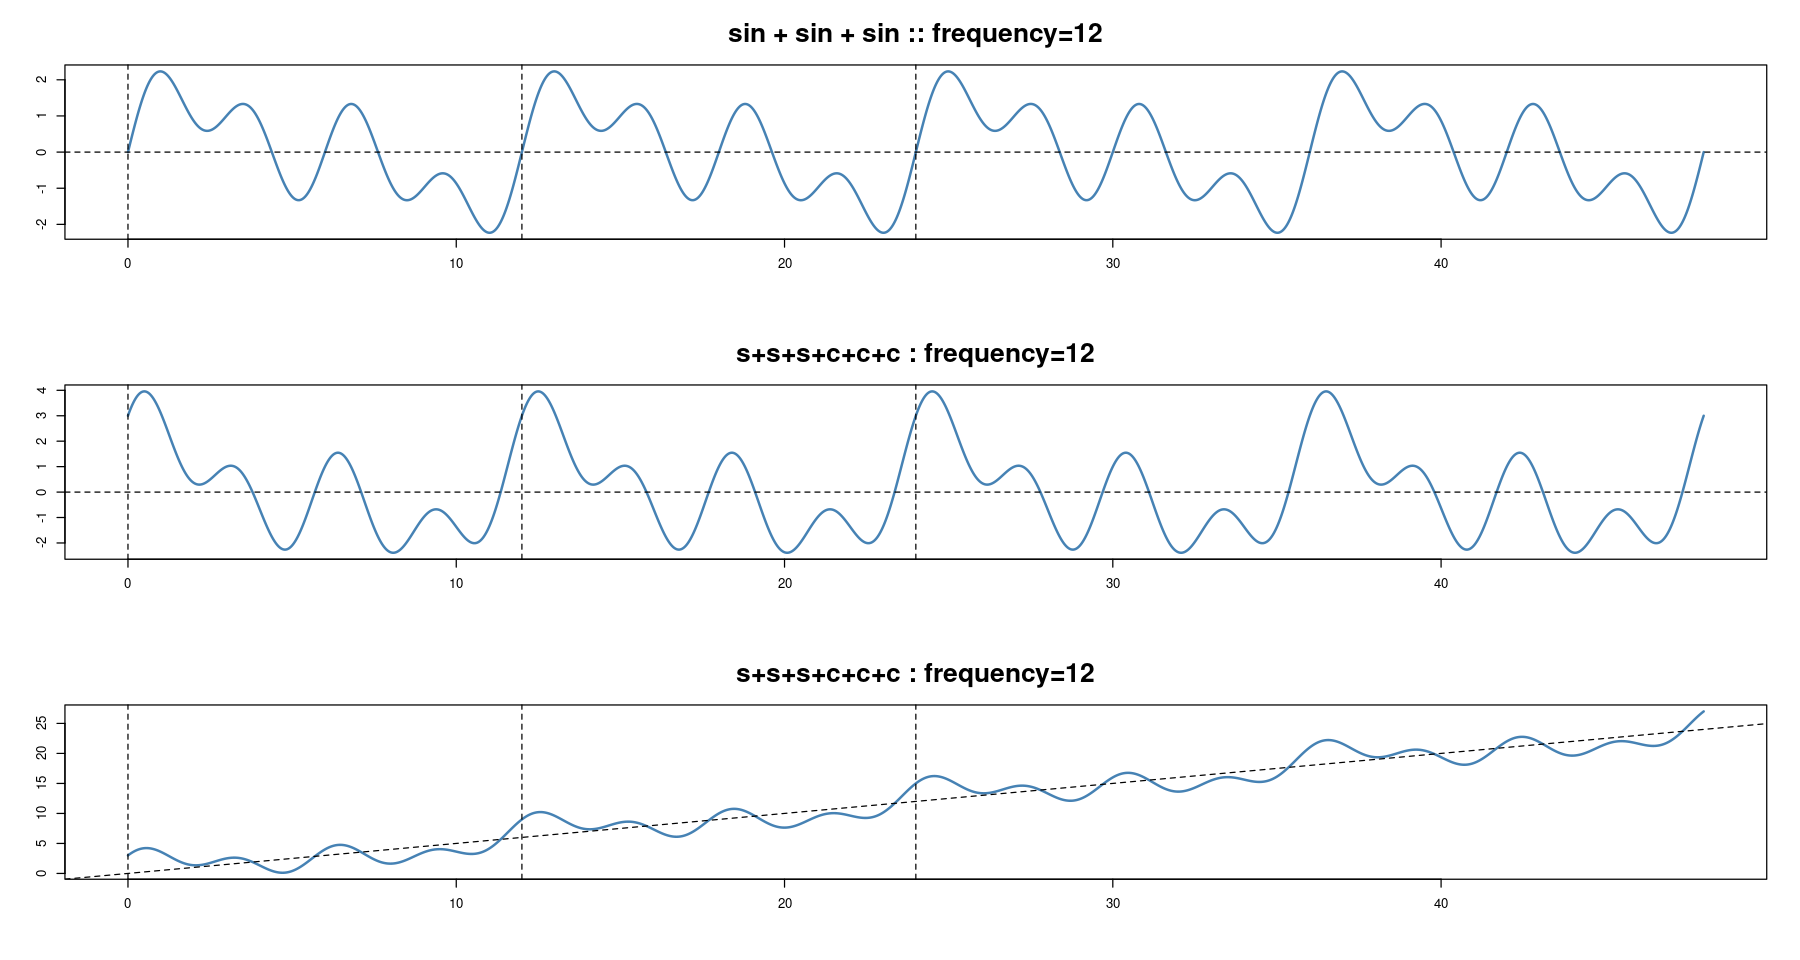

In [30]:
par(mfrow=c(3,1))
plot(x, sin(2*pi*x/12)+sin(2*pi*x/6)+sin(2*pi*x/3),
     type='l', col='steelblue', lwd=2,
    xlab="", ylab="", main=paste0('sin + sin + sin :: ', "frequency=", 12), cex.main=2)
abline(h=0, lty=2)
abline(v= seq(0, 24, by=12), lty=2)

y <- sin(2*pi*x/12)+sin(2*pi*x/6)+sin(2*pi*x/3)+
    cos(2*pi*x/12)+cos(2*pi*x/6)+cos(2*pi*x/3)

plot(x,y, type='l', col='steelblue', lwd=2,
    xlab="", ylab="", main="s+s+s+c+c+c : frequency=12", cex.main=2)
abline(h=0, lty=2)
abline(v= seq(0, 24, by=12), lty=2)

y2 <- x*0.5 + sin(2*pi*x/12)+sin(2*pi*x/6)+sin(2*pi*x/3)+
    cos(2*pi*x/12)+cos(2*pi*x/6)+cos(2*pi*x/3)

plot(x,y2, type='l', col='steelblue', lwd=2,
    xlab="", ylab="", main="s+s+s+c+c+c : frequency=12", cex.main=2)
abline(a = 0, b = 0.5, lty=2)
abline(v= seq(0, 24, by=12), lty=2)


-   강의노트에 있는 그림

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”

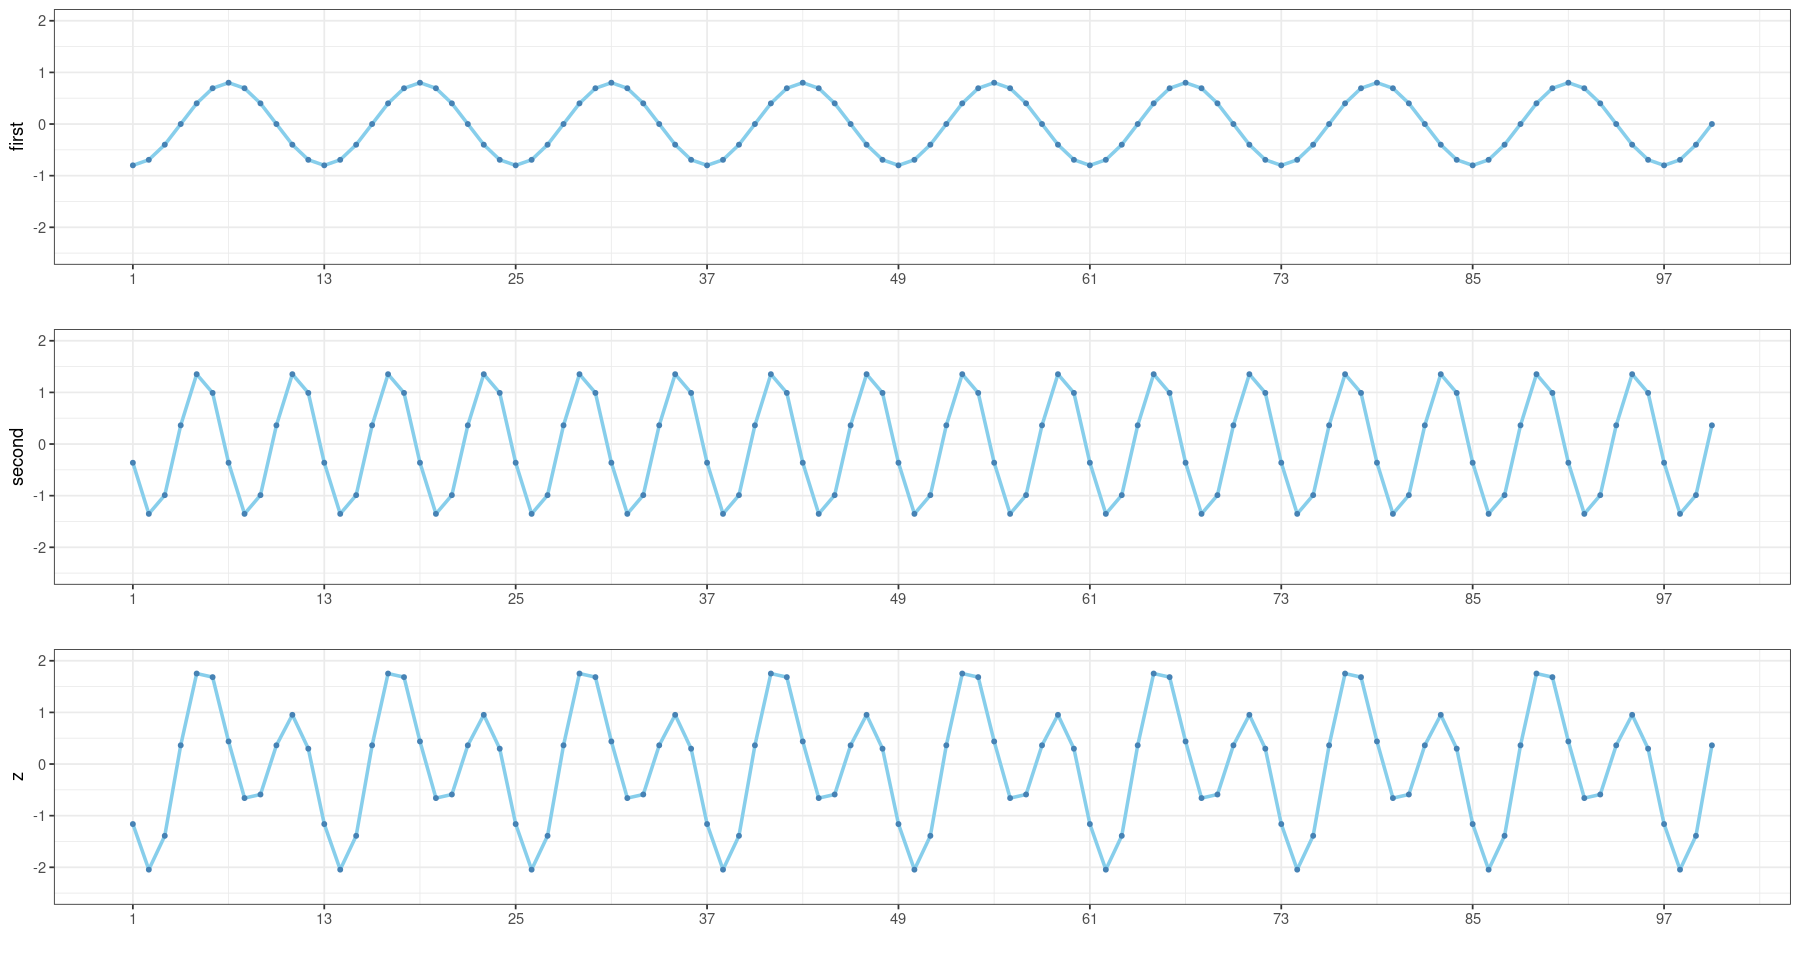

In [15]:
n <- 100;
t <- 1:n
a1 <- -0.8;
a2 <- 1.4
phi1 <- pi/3;
phi2 <- 3*pi/4
first <- a1*sin(pi*t/6+phi1) # 첫 번째 주기성분
second <- a2*sin(pi*t/3+phi2) # 두 번째 주기성분

dt <- data.frame(t=t,
                 first = first,
                 second=second,
                 z = first+second)
p1 <- ggplot(dt, aes(t,first)) + geom_line(col='skyblue', size=1) +
 geom_point(col='steelblue', size=1)+
 ylim(-2.5,2)+xlab("")+
 scale_x_continuous(breaks = seq(1,100, by = 12))+
 theme_bw()

p2 <- ggplot(dt, aes(t,second)) + geom_line(col='skyblue', size=1) +
 geom_point(col='steelblue', size=1)+
 ylim(-2.5,2)+xlab("")+
 scale_x_continuous(breaks = seq(1,100, by = 12))+
 theme_bw()

p3 <- ggplot(dt, aes(t,z)) + geom_line(col='skyblue', size=1) +
 geom_point(col='steelblue', size=1)+
 scale_x_continuous(breaks = seq(1,100, by = 12))+
 ylim(-2.5,2)+xlab("")+
 theme_bw()

grid.arrange(p1, p2, p3, nrow = 3)


# 백화점 매출액 - 지시함수 사용

In [19]:
z <-scan("depart.txt")
head(z)


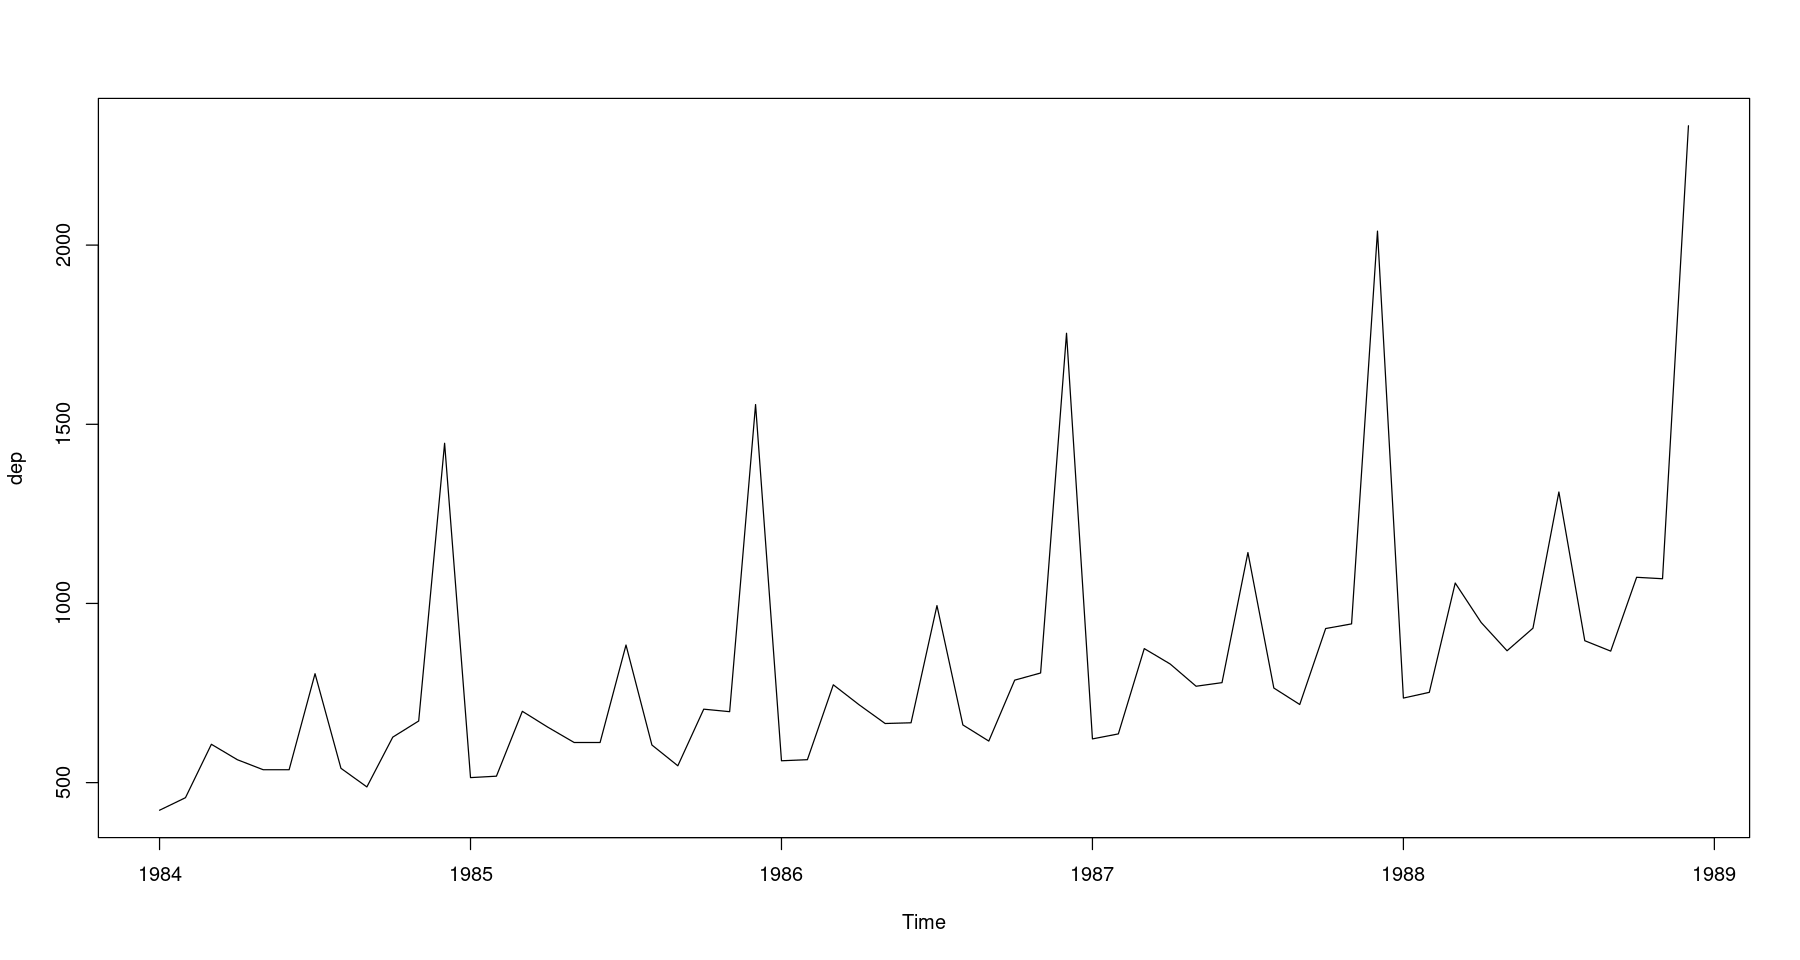

In [32]:
dep <- ts(z, frequency=12, start=c(1984,1))   # 1984년 1월부터 시작
plot(dep)


-   약간 이분산성이 있어보인다. 로그변환이나 박스콕스변환을 하자.

In [34]:
class(dep)

In [35]:
cycle(dep)

## 강의 영상..

In [99]:
lndep <- log(z)

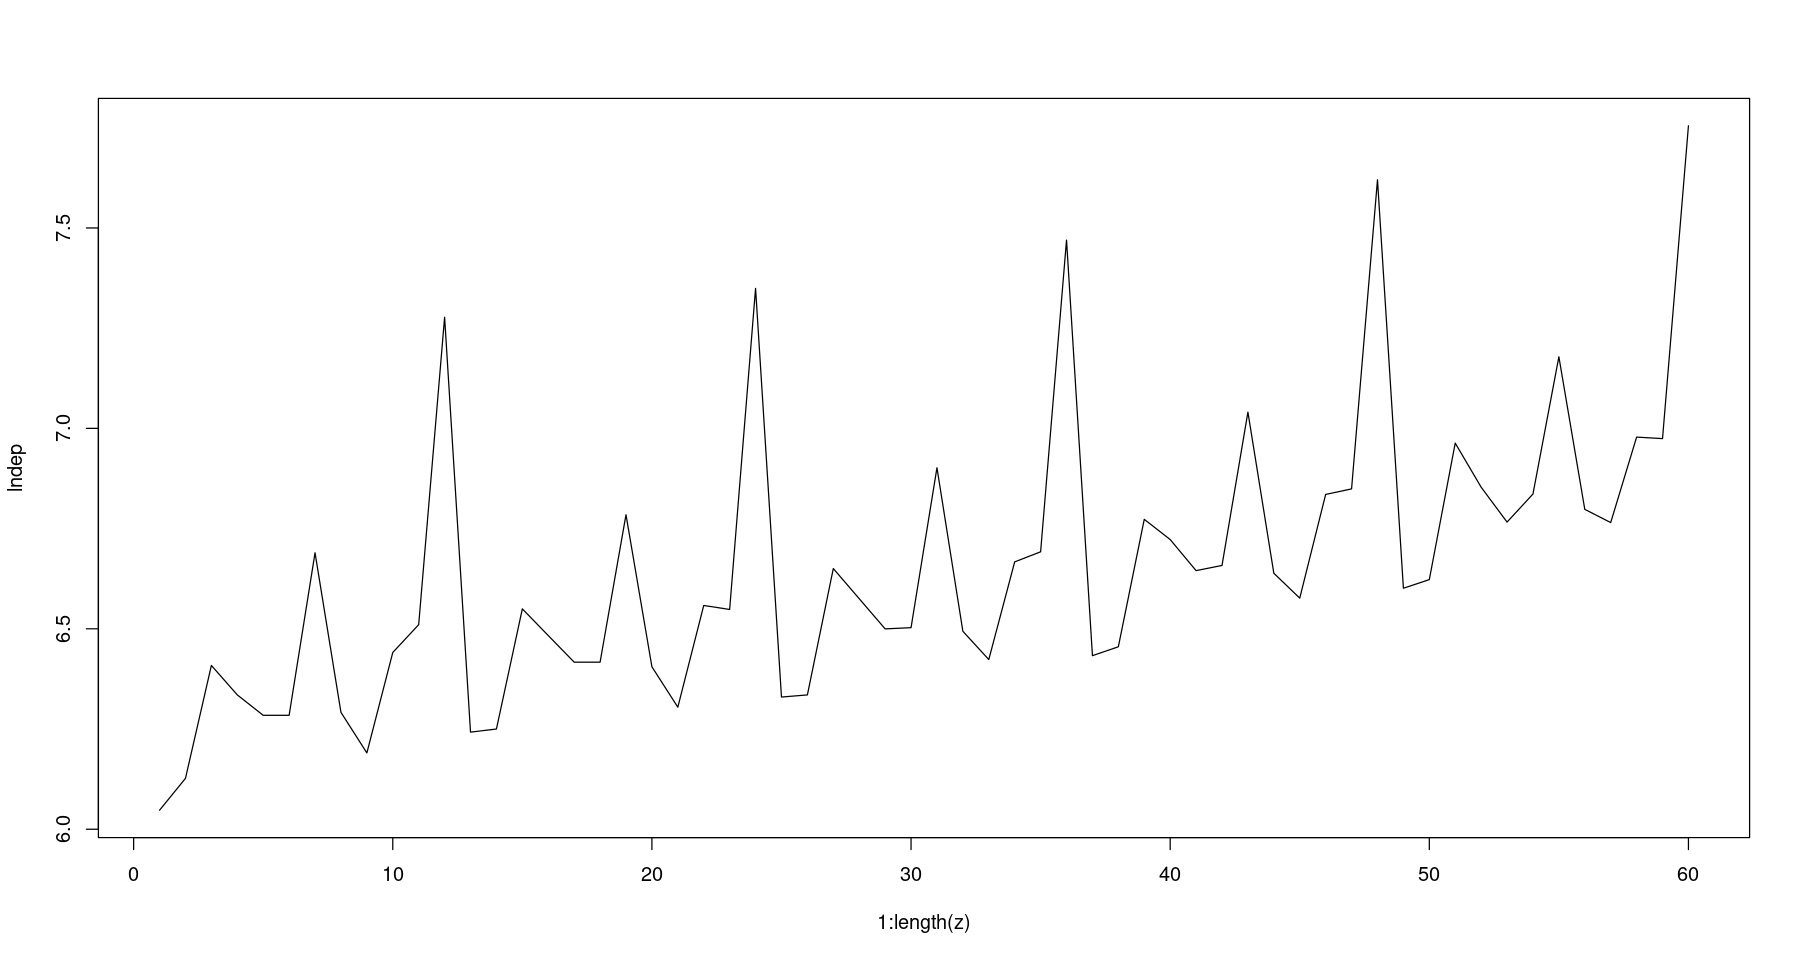

In [100]:
plot(1:length(z), lndep, type='l')

-   등분산이 일정해 보인다.

In [101]:
trend <- 1:length(z)
trend    # 추세를 넣기 위해서 trend라는 변수 생성


In [102]:
reg <- lm(lndep ~ trend)
summary(reg)

-   1차 선형 모형

In [103]:
reg <- lm(lndep ~ trend + cycle(dep))   # 주기함수가 cycle이라 했으니, cycle을 넣어주면 될까 하고 넣어보자!
summary(reg)

여기서 cycle은 1~12라는 수치형으로 넣어진 거라.. 범주형 변수로 바꿔줘야
한다.

In [47]:
reg <- lm(lndep ~ trend + as.factor(cycle(dep)))  
summary(reg)

근데 위에 좀 안이쁘니까 밑에 tmp.data라는 함수를 만들자.

In [104]:
tmp.data <- data.frame(
    dep = z,
    lndep = log(z),
    day = seq(ymd("1984-01-01"), by = "1 month", length.out = length(z)),
    s = as.factor(cycle(dep)),
    t = 1:length(z)
    )
head(tmp.data)

-   가변수를 넣을 때는 factor로!!

In [105]:
reg <- lm(lndep ~ t+s, tmp.data)      
summary(reg)

-   강의자료에서 있었던 제약조건을 생각하자.

beta0=0/beta1=0/sum_beta=0

위의 제약조건에서 아무런 내용이 없으면 beta1=0을 default로 설정함

-   위의 summary 1월이 기준이므로

s2의 `0.0166091` 는 1월보다 이만큼 더 팔린다는 뜻이고..

s3의 `0.3169279` 는 1월보다 0.3만큼 더 팔린다는 뜻!

다른 것들은 거의 다 유의한데 s2는 별로 유의하지 않다. -\> 왜? 1월과
2월의 시간차가 별로 없기 떄문에.. 1월보다 이만큼 더 팔리긴 하지만
통계적으로 더 유의하진 않아~ 라는 말.

In [106]:
reg2 <- lm(lndep ~ 0+t+s, tmp.data)  # 제약조건에서 beta0=0으로 놓는다는 뜻. 절편을 0으로!      
summary(reg2)

-   intersept가 없어짐!

s1이 의미하는 것은 1월 판매량의 평균

s2가 의미하는 것은 2월 판매량의 평균

모형의 유의하냐는 0이냐 그걸로 하는거라서 다 유의하다 나옴!

위에랑 차이는 계수 해석 조심하기.

In [107]:
reg3 <- lm(lndep ~ t+s, tmp.data,
           contrast = list(s="contr.sum"))
summary(reg3)

-   위의 코드는 제약 조건 중에 sum_beta=0인것을 의미함

-   엇? s12가 없다! s12 = -(s1+ … + s11) 로 해석하면 됨

In [108]:
head(data.frame(hat_y1 = fitted(reg),
                hat_y2 = fitted(reg2),
                hat_y3 = fitted(reg3)))

어떤 제약조건을 써도 fitted의 값은 똑같다! 계수 설명만 다름

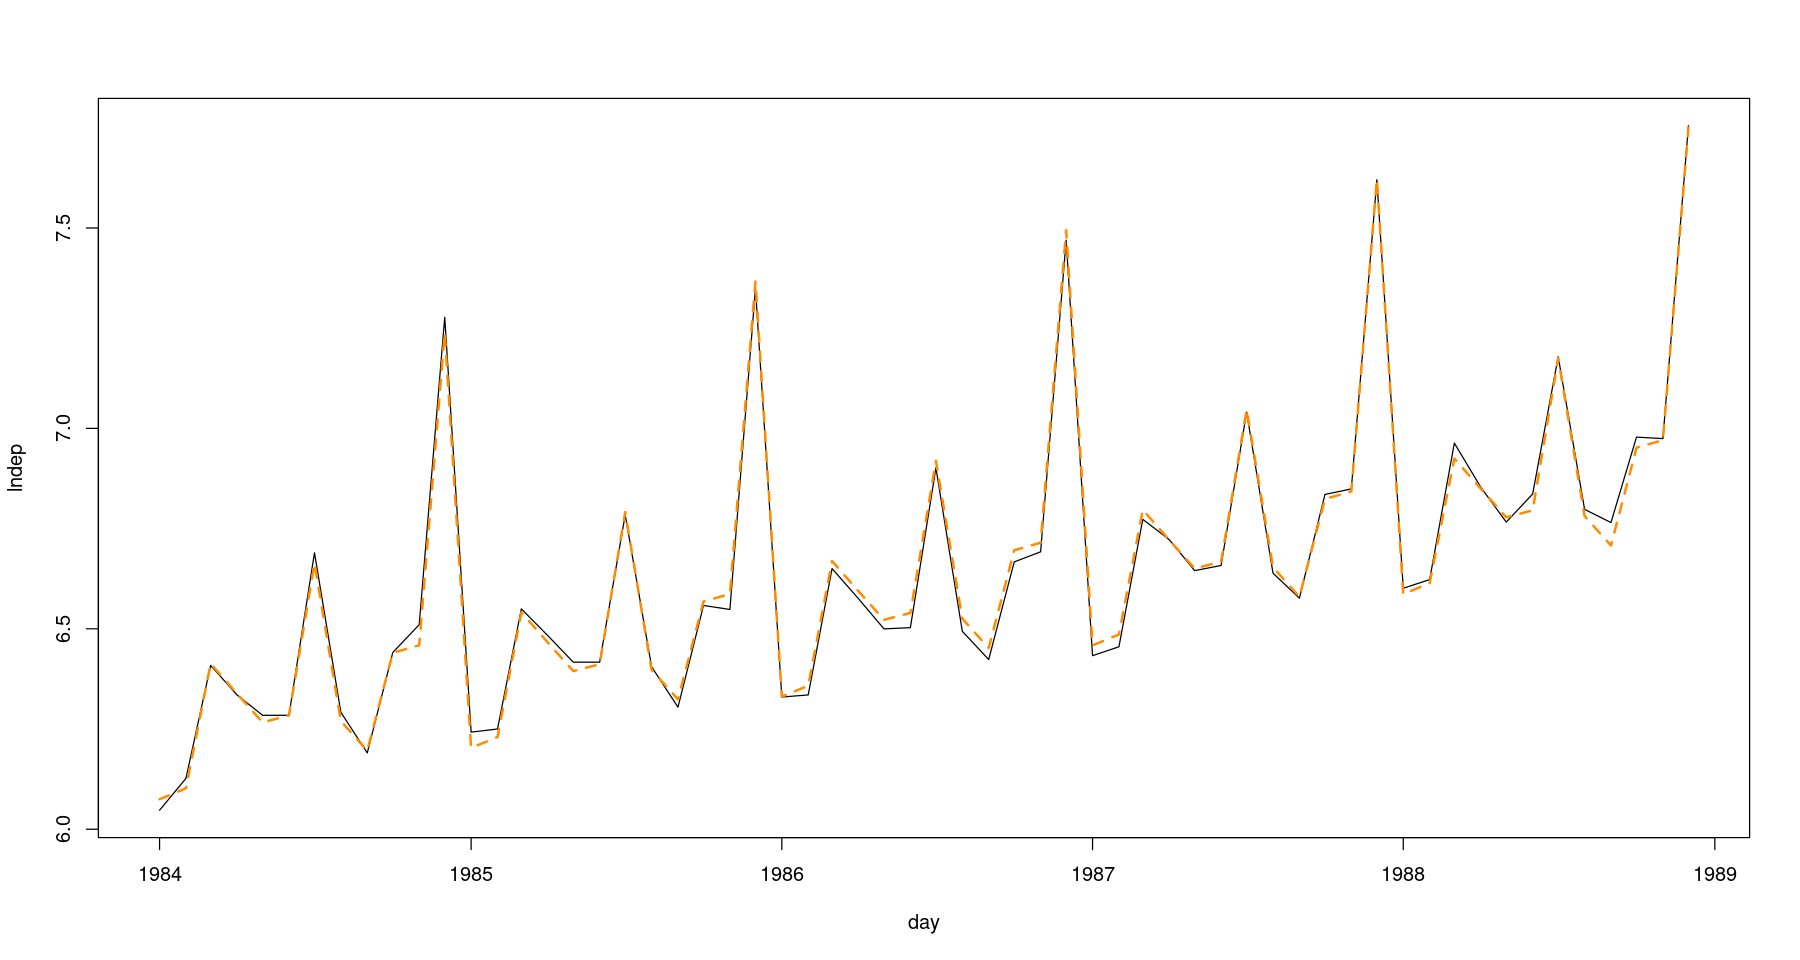

In [69]:
plot(lndep ~ day, tmp.data, type='l')
lines(tmp.data$day, fitted(reg), col='darkorange', lty=2, lwd=2)

-   실제값과 fittied value가 유사하게 가는 걸 확인할 수 있다.

## 강의 자료

In [112]:
tmp.data <- data.frame(
 day = seq(ymd("1984-01-01"),
 by='1 month', length.out=length(z)),
 z=z
)


In [113]:
head(tmp.data)


In [114]:
tmp.data$lndep <- log(z) #로그변환
tmp.data$y <- as.factor(as.integer(cycle(dep))) #지시함수로 사용할 주기
tmp.data$trend <- 1:length(z) #시간 변수 생성


In [117]:
head(tmp.data)


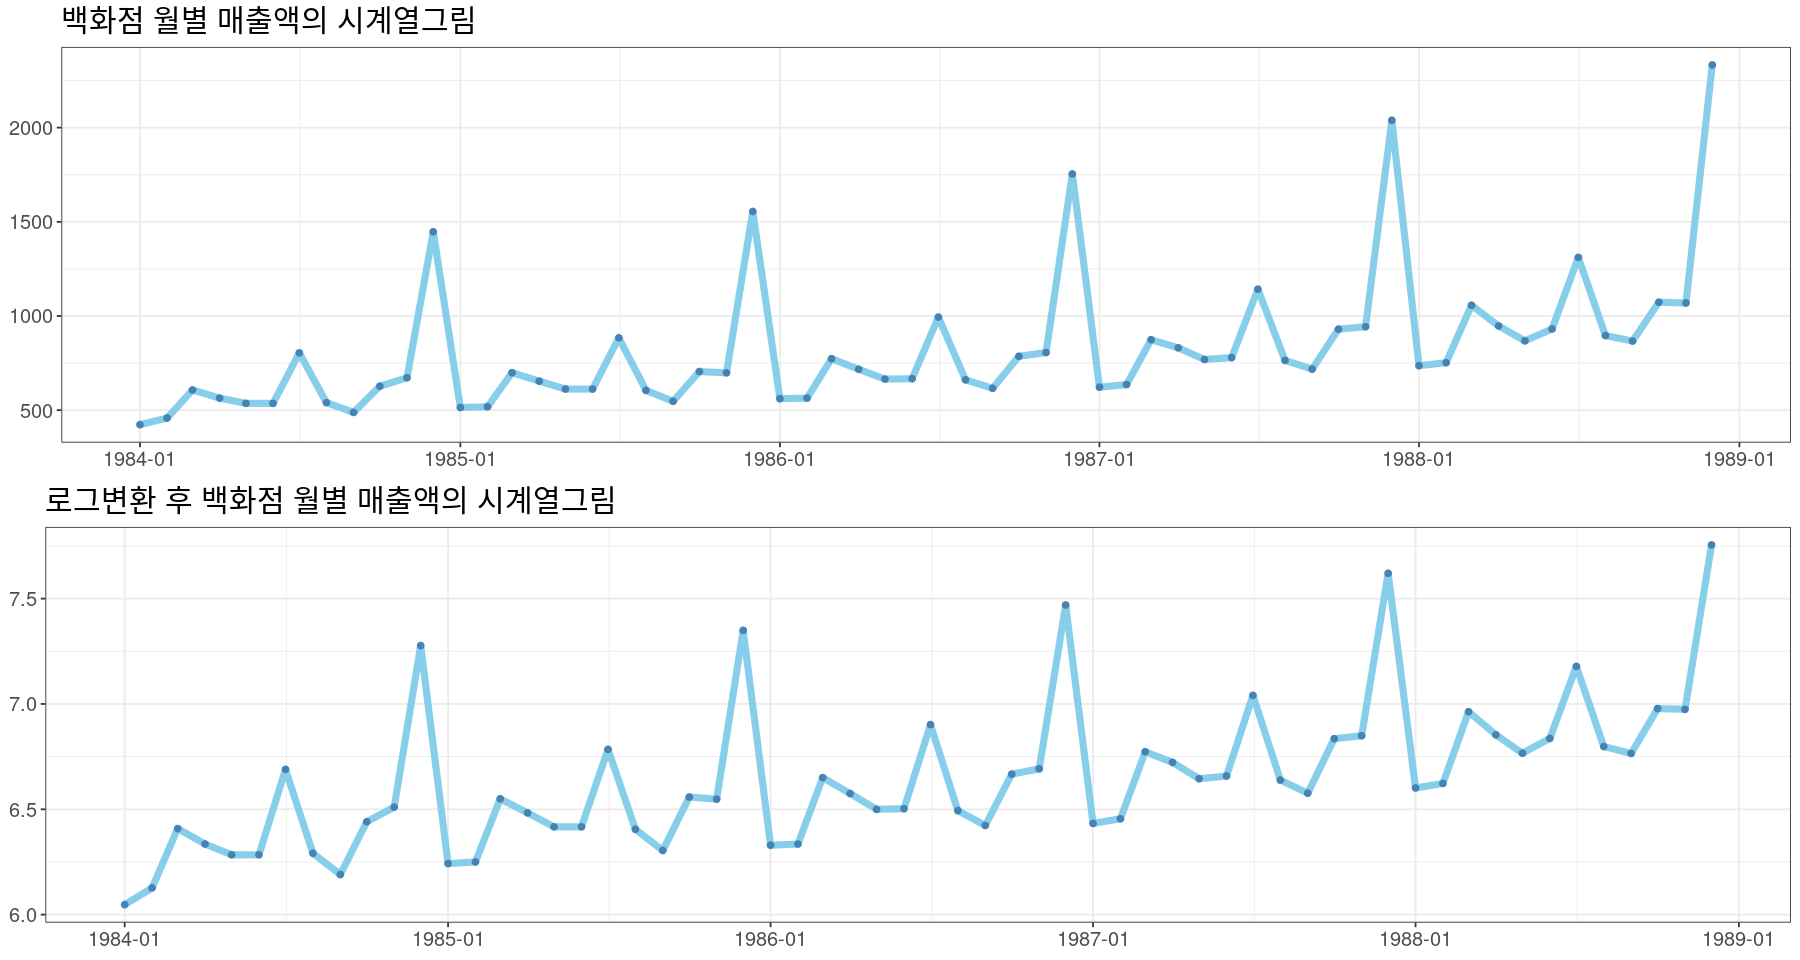

In [118]:
p1 <- ggplot(tmp.data, aes(day, z)) +
 geom_line(col='skyblue', lwd=2) +
 geom_point(col='steelblue', cex=1.5)+
 scale_x_date(date_breaks = "1 year", date_labels = "%Y-%m") +
 ggtitle("백화점 월별 매출액의 시계열그림") +
 theme_bw()+
 theme(axis.text = element_text(size =12),
       axis.title = element_blank(),
       title = element_text(size = 15))

p2 <- ggplot(tmp.data, aes(day, lndep)) +
 geom_line(col='skyblue', lwd=2) +
 geom_point(col='steelblue', cex=1.5)+
 scale_x_date(date_breaks = "1 year", date_labels = "%Y-%m") +
 ggtitle("로그변환 후 백화점 월별 매출액의 시계열그림") +
 theme_bw()+
 theme(axis.text = element_text(size =12),
       axis.title=element_blank(),
       title = element_text(size = 15))

grid.arrange(p1,p2,nrow=2)


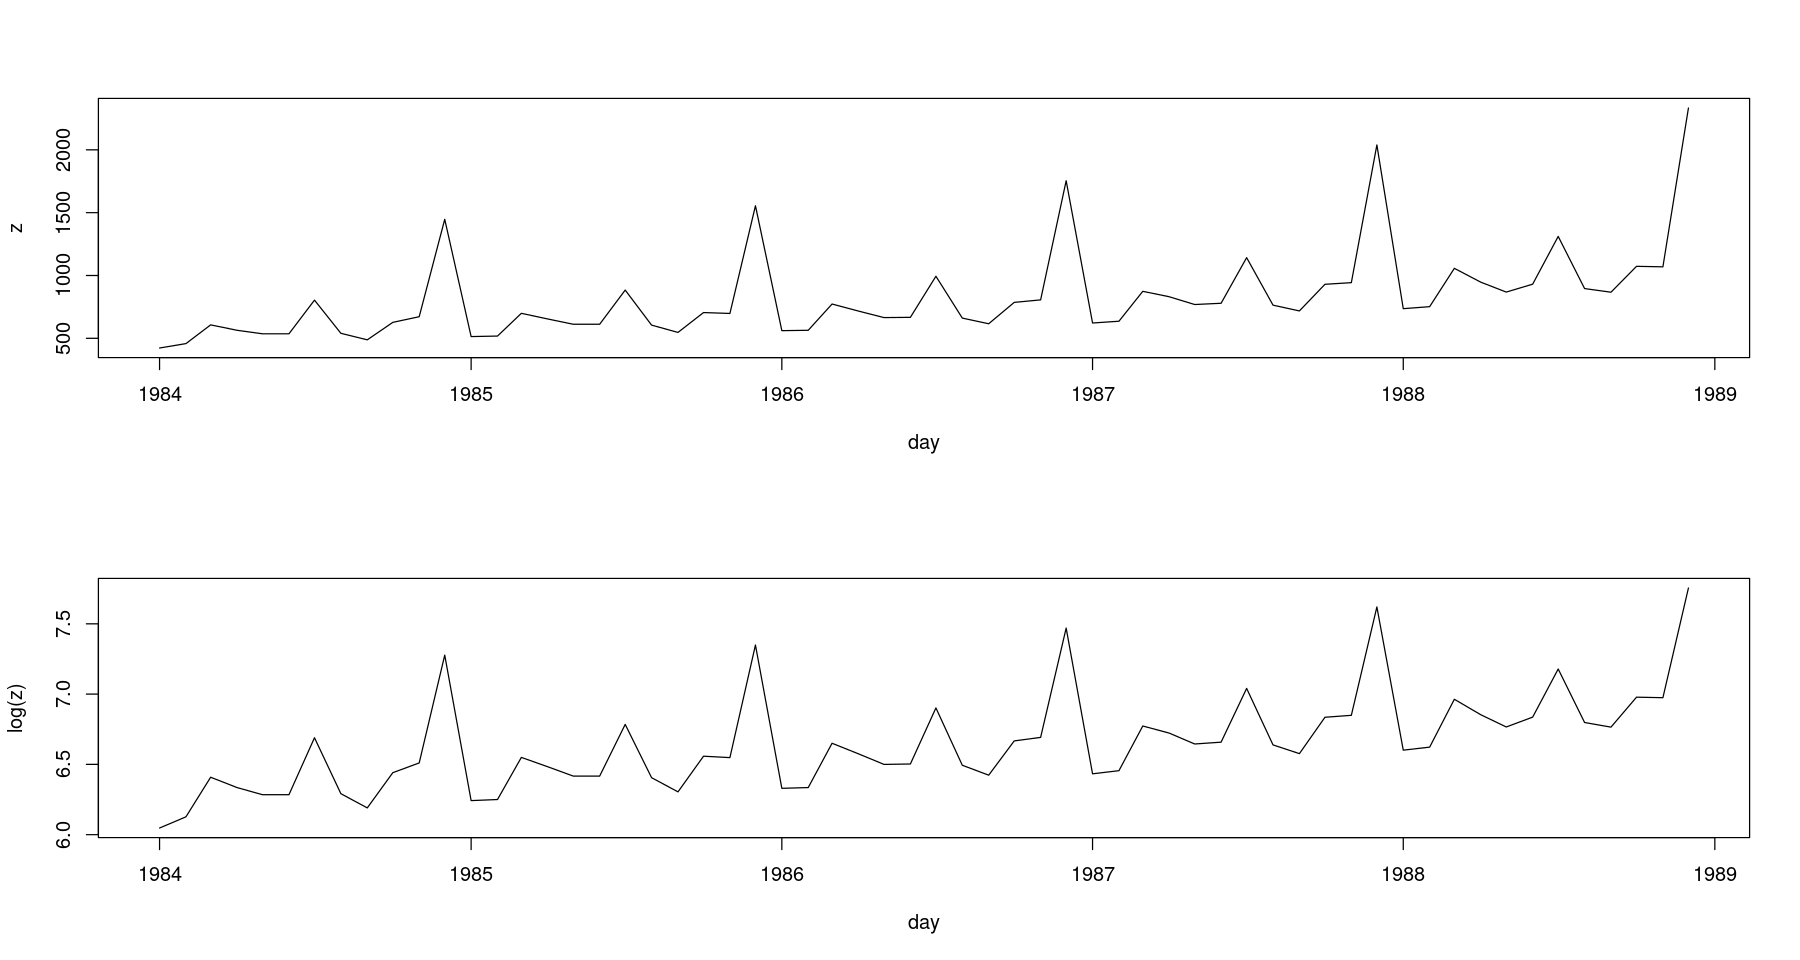

In [119]:
par(mfrow=c(2,1)) 
plot(z~day, tmp.data, type='l')
plot(log(z)~day, tmp.data, type='l')


`-` 모형 적합:
$log(Z_t) = \beta_{trend}t + \beta_1 I_{t,1} + \dots + \beta_{12} I_{t,12} + \epsilon_t (\beta_0=0)$

In [120]:
reg <- lm(lndep ~ 0 + trend+y, data=tmp.data ) #beta_0 = 0
summary(reg)


`-` 모형 적합:
$log(Z_t) = \beta_0+ \beta_{trend}t + \beta_2 I_{t,2} + \dots + \beta_{12} I_{t,12} + \epsilon_t (\beta_1=0)$

In [122]:
reg2 <- lm(lndep ~ trend+y, data=tmp.data ) #beta_1=0
summary(reg2)


In [81]:
contrasts(tmp.data$y)

`-` 모형 적합:
$log(Z_t) = \beta_0+ \beta_{trend}t + \beta_1 I_{t,1} + \dots + \beta_{11} I_{t,11} + \epsilon_t (\sum_{i=1}^{12} \beta_i=0)$

In [123]:
reg3 <- lm(lndep ~ trend+y, data=tmp.data,
 contrasts = list(y = "contr.sum")) #sum beta_i = 0
# b1 + ... +b12 = 0 => b12 = -(b1+...+b11)
summary(reg3)


In [83]:
head(data.frame(hat_y1 = fitted(reg),
 hat_y2 = fitted(reg2),
 hat_y3 = fitted(reg3)))


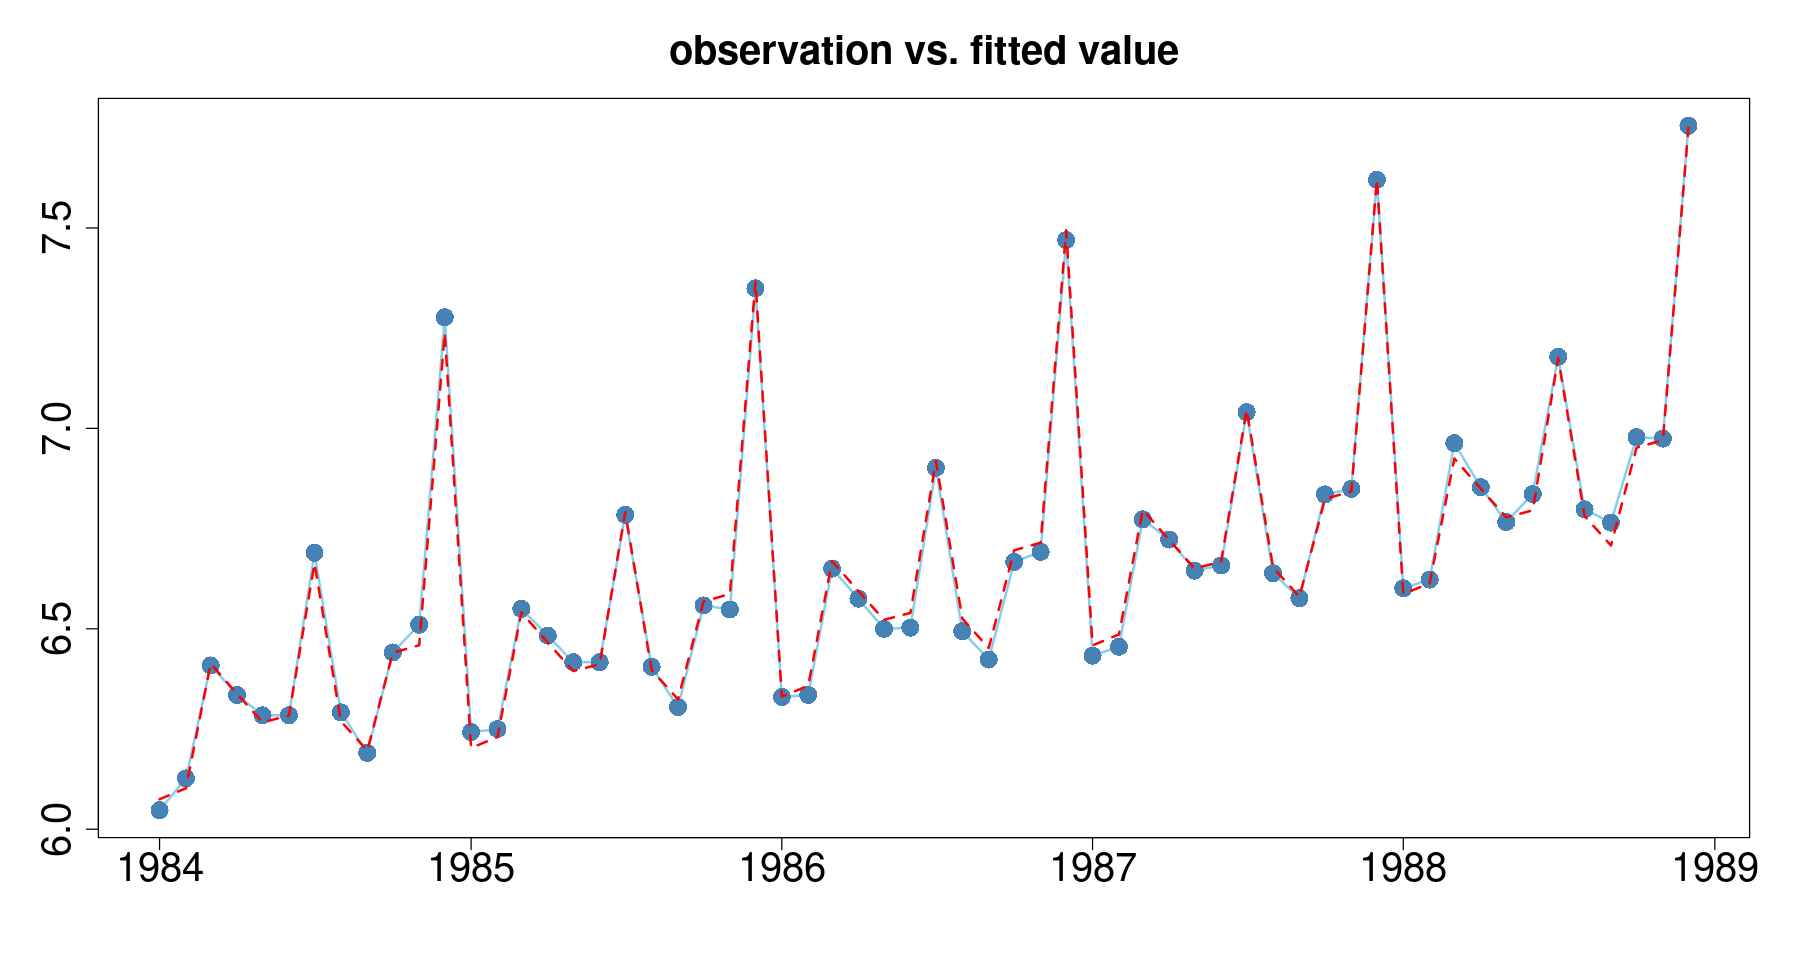

In [85]:
plot(lndep~day, tmp.data,
 main = 'observation vs. fitted value',
 xlab="", ylab="",
 type='l',
 col='skyblue',
 lwd=2, cex.axis=2, cex.main=2) +
 points(lndep~day, tmp.data, col="steelblue", cex=2, pch=16) +
 lines(tmp.data$day, fitted(reg), col='red', lty=2, lwd=2)

## 잔차 분석

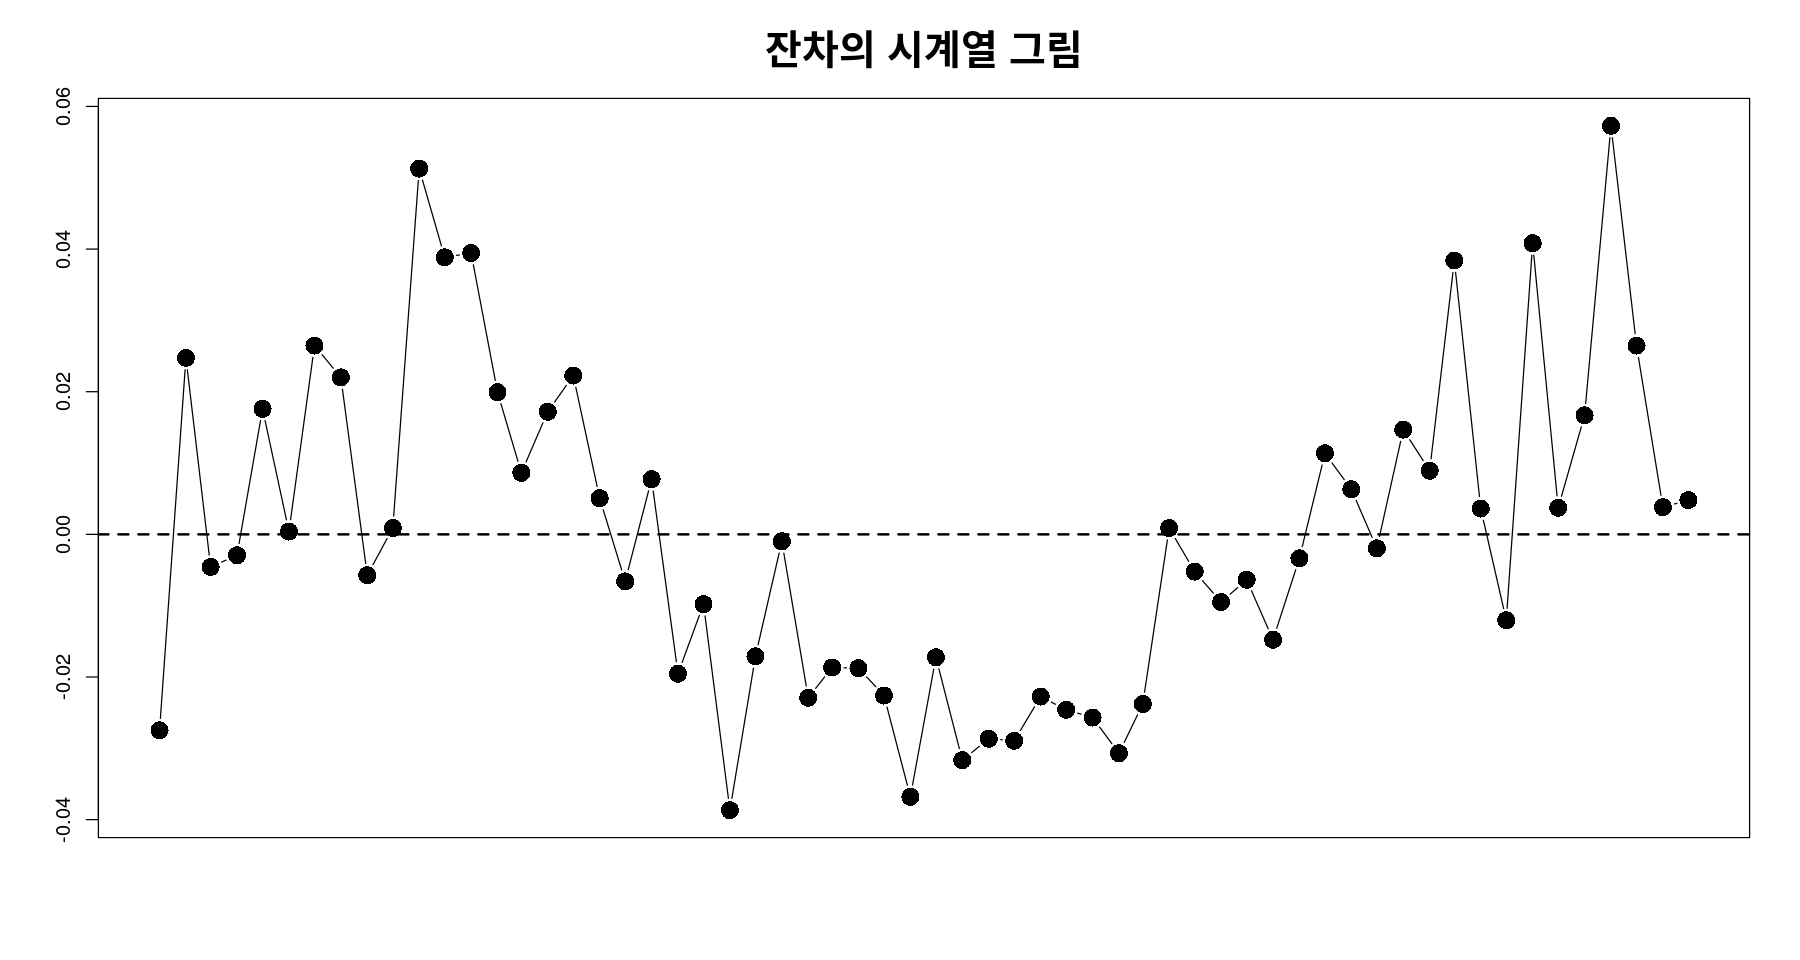

In [86]:
plot(tmp.data$day, resid(reg),
 pch=16, cex=2, xaxt='n', type='b',
 xlab="", ylab="", main="잔차의 시계열 그림", cex.main=2)
abline(h=0, lty=2, lwd=2)

## 독립성 검정 : dW test

In [87]:
dwtest(reg, , alternative="two.sided")

유의확률도 작고 기각할수 있고 양의 상관관계..

In [88]:
dwtest(reg)

## 정규분포 검정 (shapiro-wilk test)

`-` 가설

$H_0$: 정규분포를 따른다. VS $H_1$: 정규분포를 따르지 않는다.

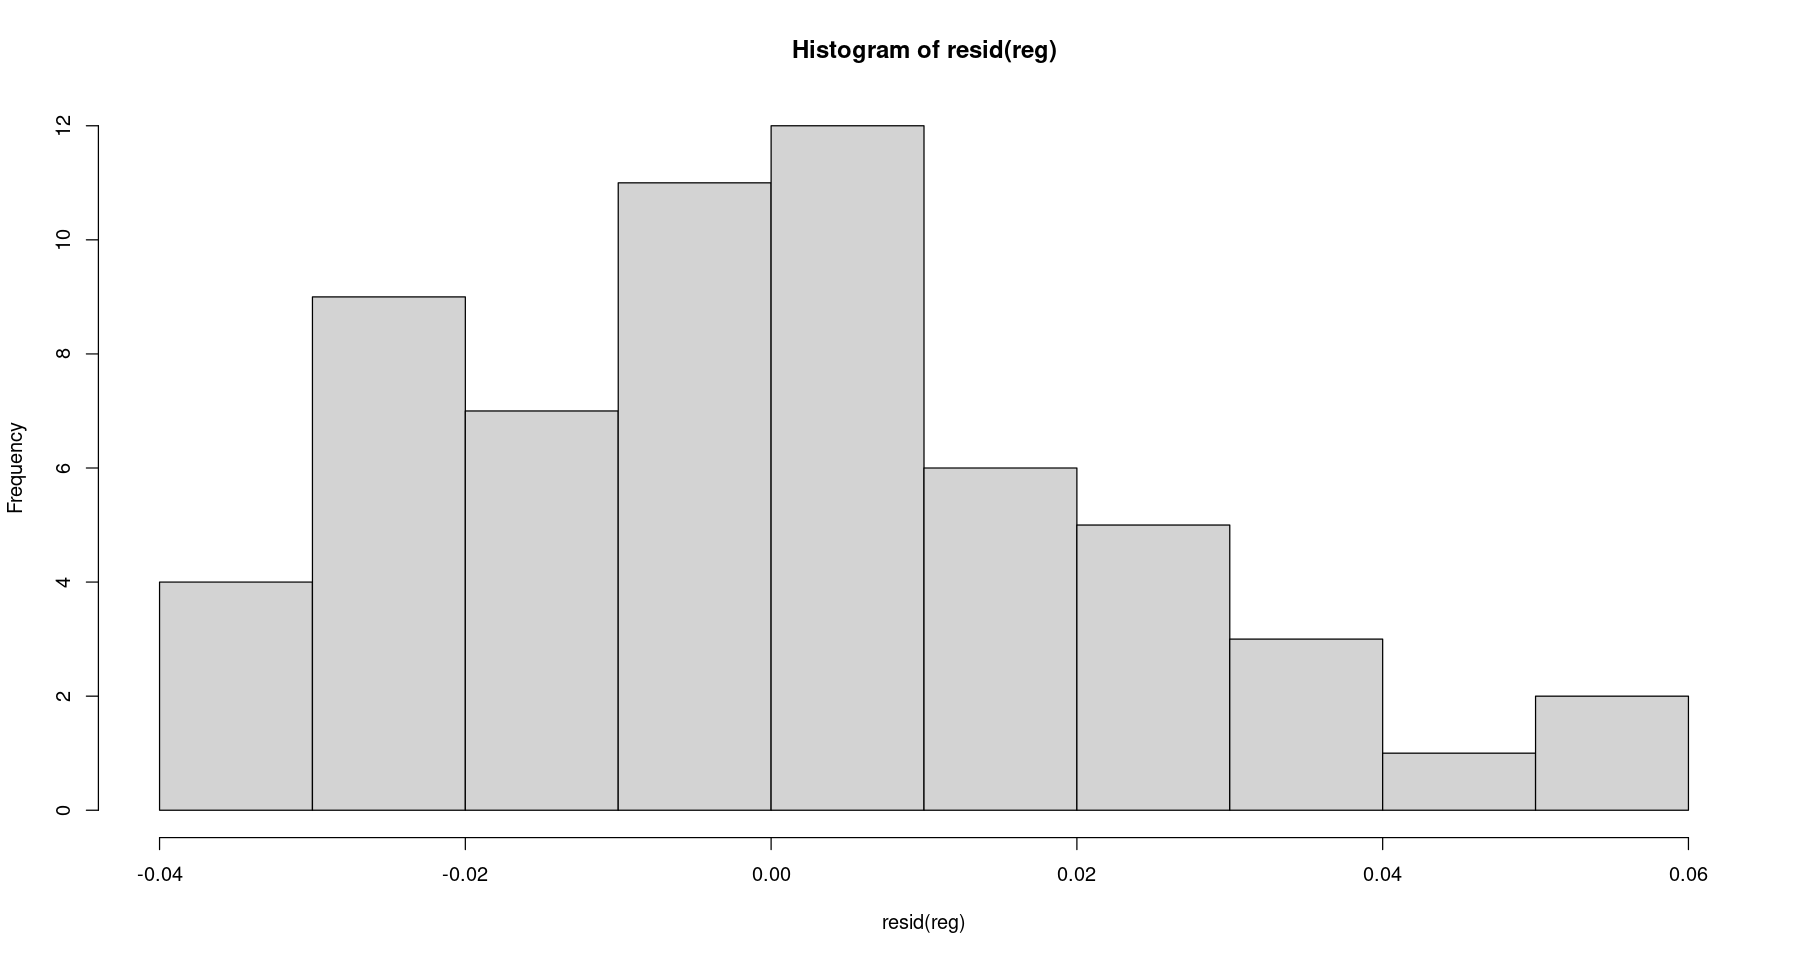

In [89]:
hist(resid(reg))


In [90]:
shapiro.test(resid(reg)) #H_0 : 정규분포를 따른다.


정규분포를 따른다고 보자.

## 등분산성검정 (Breusch–Pagan test)

`-` 가설

$H_0$: 등분산 VS $H_1$: 이분산

In [91]:
bptest(reg)

등분산성도 괜찮아 보인다.

## 적립값에 대한 MSE 구하기

$$MSE=\frac{1}{n} \sum_{t=1}^n (Z_t - \hat{Z_t})^2$$

오차항 제곱합에 대한 평균. 실제값과 평균값에 대하 차이를 n으로 나눈값

위에서 그림그릴때는 log값으로 했던 거니까, 실제로 실제 10년후? 20년후?를
생각할 때는 exp을 취해서 비교해주는게 원래 맞음

MSE! 그래서 밑에서 exp값 취해줌

In [109]:
mse1 = sum((tmp.data$dep - exp(fitted(reg)))^2)/60

In [110]:
mse1

In [92]:
hat_z = exp(fitted(reg))
head(hat_z)

In [93]:
mse_reg_indicator <- sum((z- hat_z)^2)/length(z)
mse_reg_indicator


## 백화점 매출액 - 삼각함수 이용

`-` 데이터 생성

In [124]:
tmp.data_2 <- data.frame(
 lndep = tmp.data$lndep,
 trend = tmp.data$trend)

In [125]:
head(tmp.data_2)


In [128]:
dt1 <- Reduce(cbind.data.frame, lapply(as.list(1:5), function(i) sin(2*pi*i/12*tmp.data_2$trend)))
head(dt1)


위 dataframe에서 init:사인 주기가 12인것. x\[\[i\]\]: 사인 주기가
6인거.. 주기 4 주기 3 주기 2.5? 인거까지 데이터 프레임이 들어감..

In [129]:
names(dt1) <- paste("sin", c(12,6,4,3,2.4), sep="_")
head(dt1)


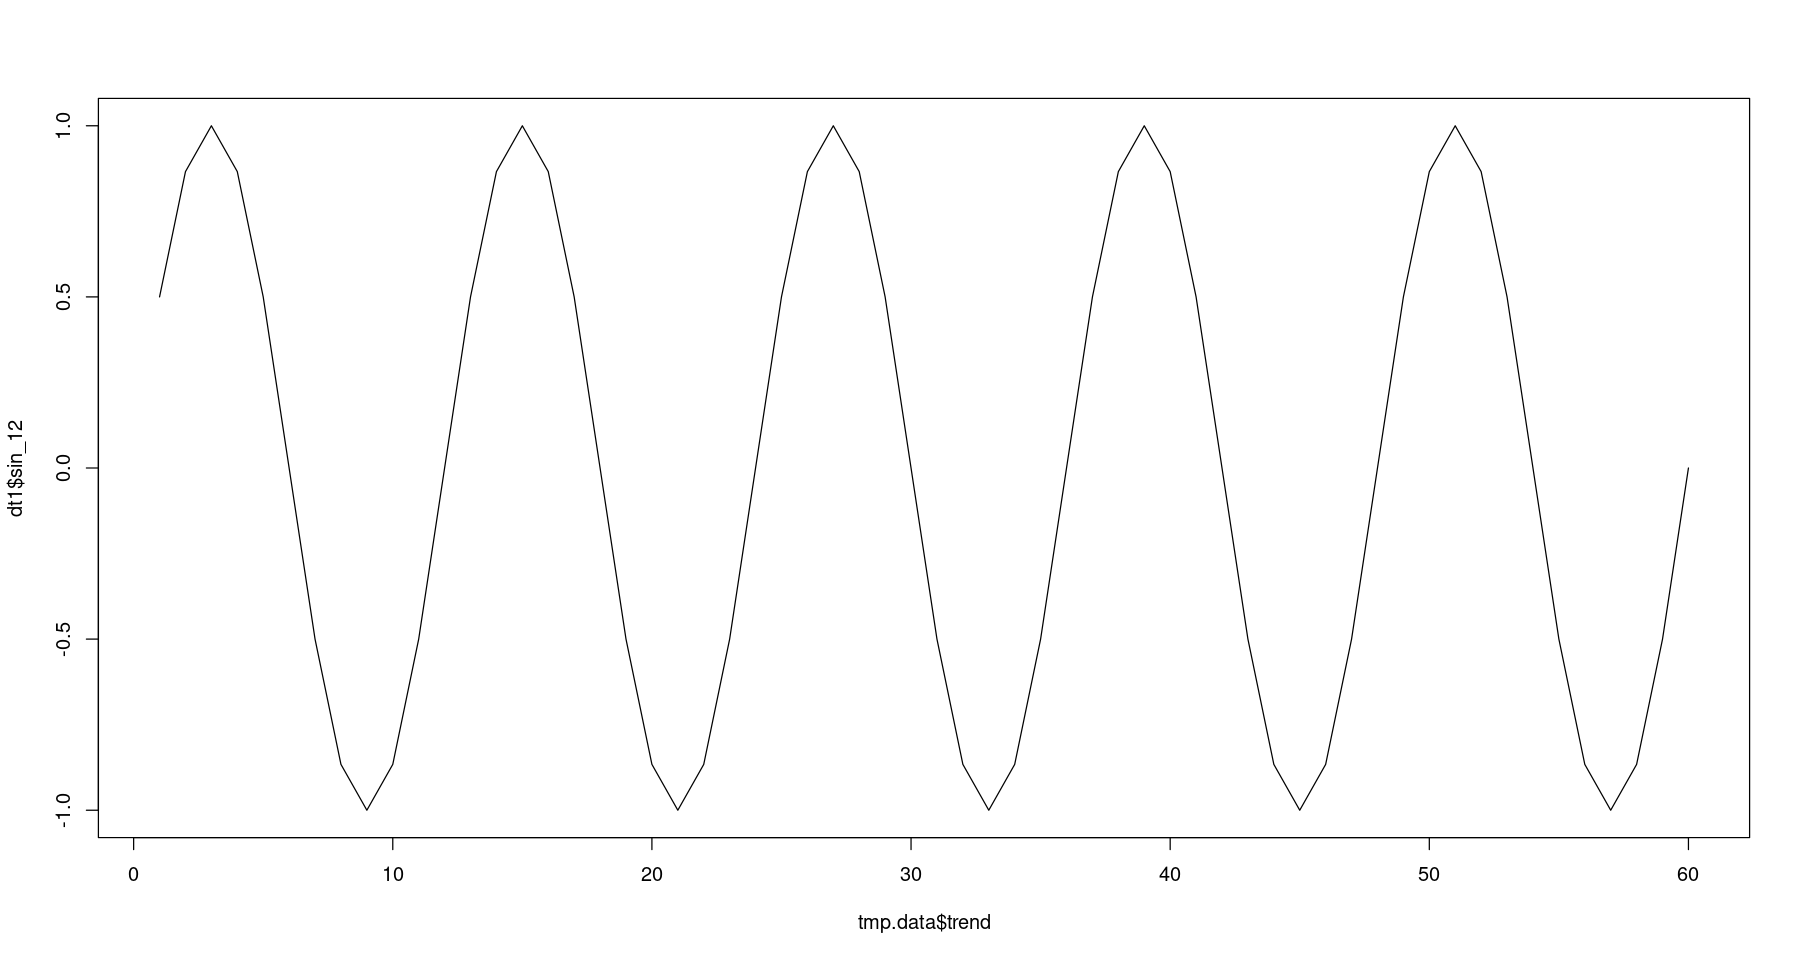

In [131]:
plot(tmp.data$trend, dt1$sin_12, type='l')

In [133]:
dt2 <- Reduce(cbind.data.frame, lapply(as.list(1:5), function(i) cos(2*pi*i/12*tmp.data_2$trend)))
names(dt2) <- paste("cos", c(12,6,4,3,2.4), sep="_")

In [134]:
tmp.data_3 <- cbind.data.frame(tmp.data_2, dt1, dt2)
head(tmp.data_3)

`-` 모형 적합

$$Z_t = \beta_0 + \beta_1 t + \sum_{i=1}^5  \{ \beta_{1,i} sin \left( \frac{2 \pi ti}{12} \right) + \beta_{2,i} cos \left( \frac{2\pi ti}{12} \right) \}$$

In [135]:
reg_sin <- lm(lndep ~., data=tmp.data_3)
summary(reg_sin)

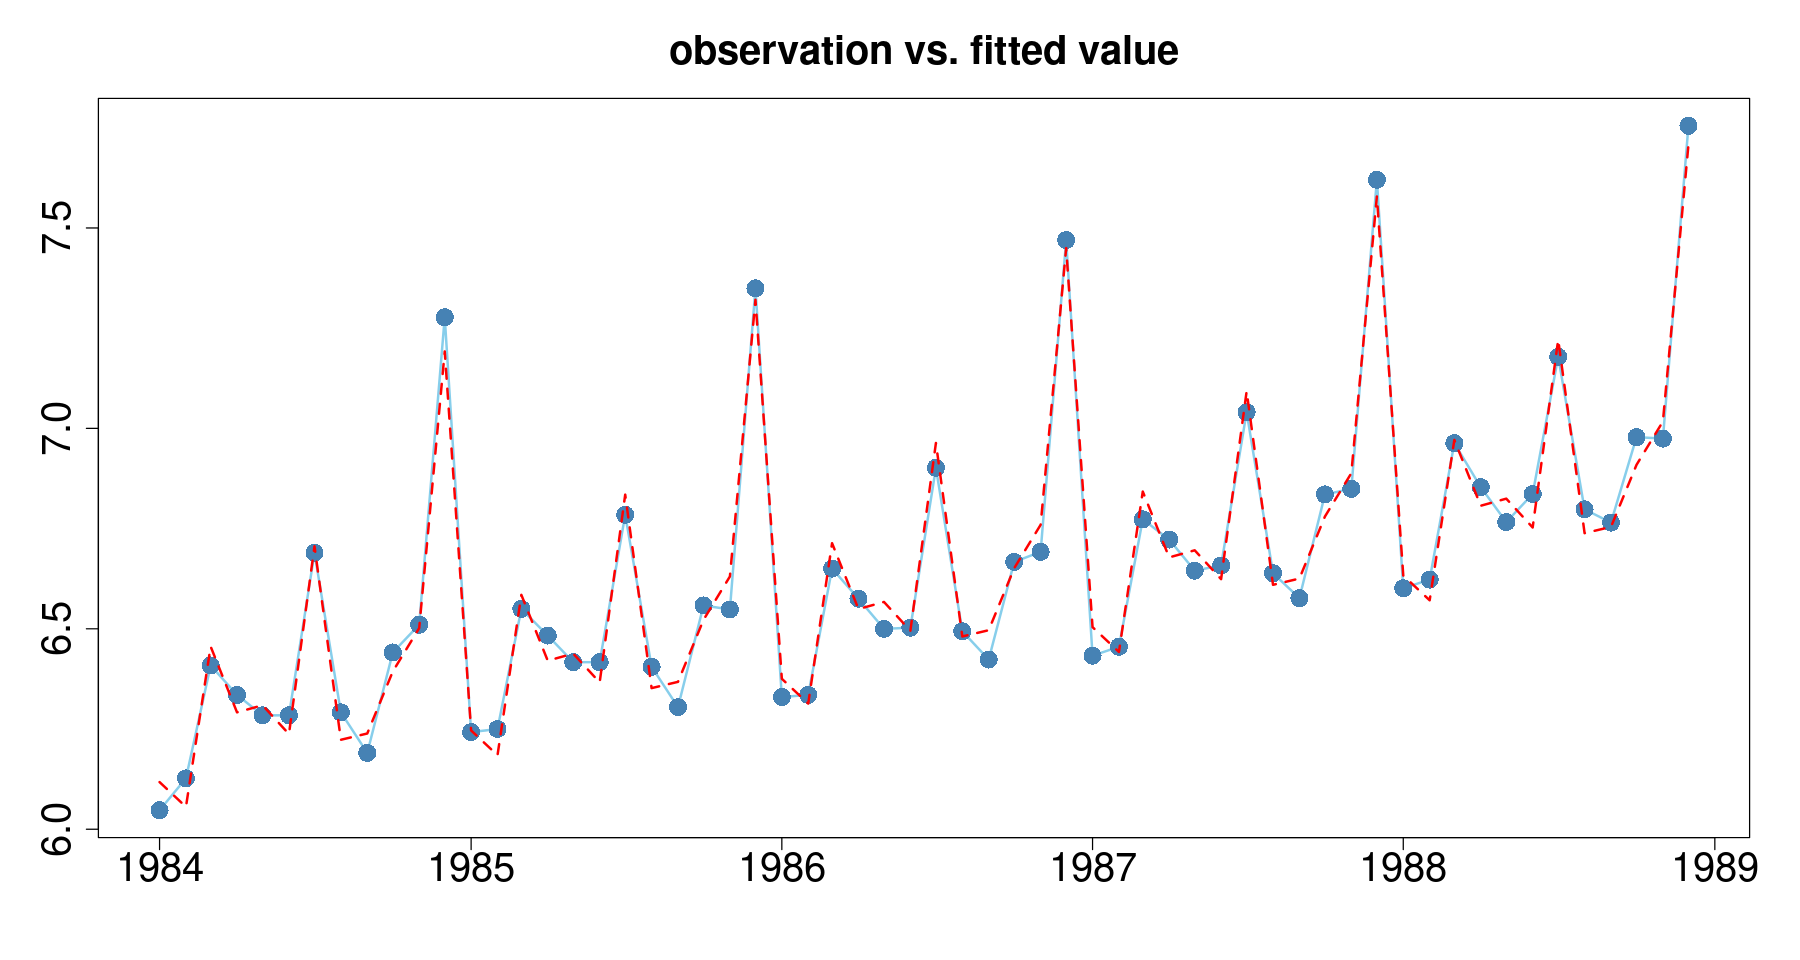

In [136]:
plot(lndep~tmp.data$day, tmp.data_3,
     main = 'observation vs. fitted value',
     xlab="", ylab="",
     type='l',
     col='skyblue',
     lwd=2, cex.axis=2, cex.main=2) +
 points(lndep~day, tmp.data, col="steelblue", cex=2, pch=16) +
 lines(tmp.data$day, fitted(reg_sin), col='red', lty=2, lwd=2)

## 잔차분석

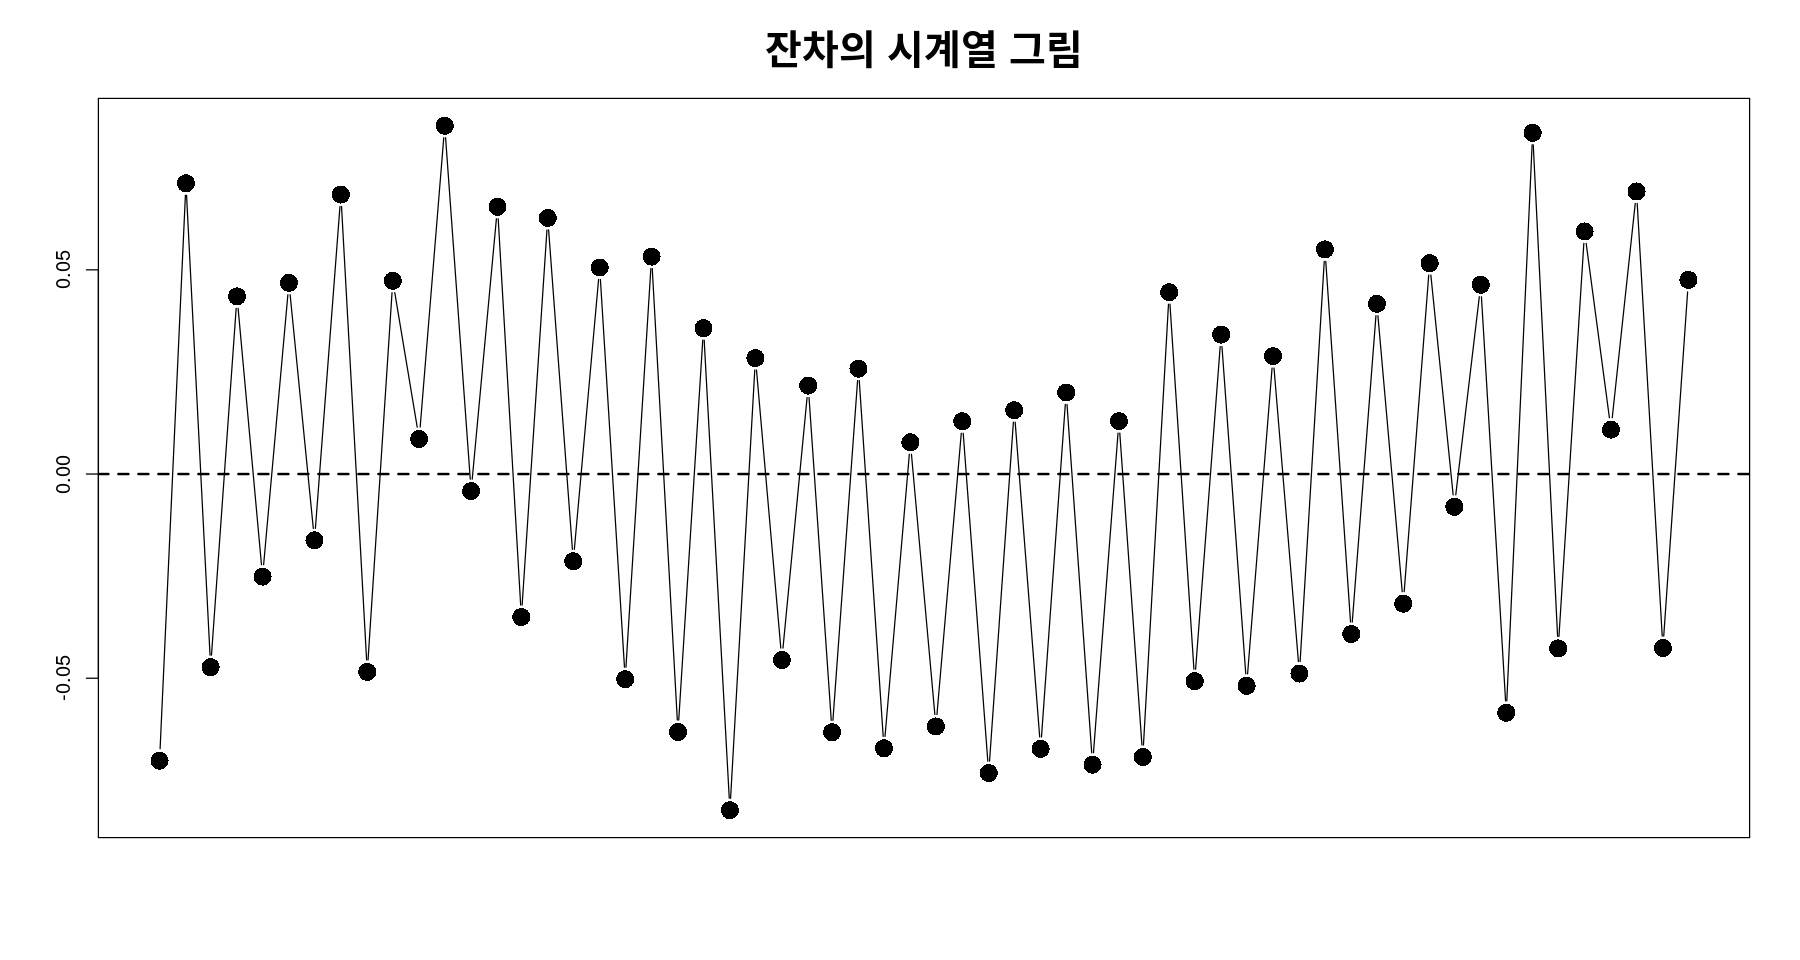

In [137]:
plot(tmp.data$day, resid(reg_sin),
 pch=16, cex=2, xaxt='n', type='b',
 xlab="", ylab="", main="잔차의 시계열 그림", cex.main=2)
abline(h=0, lty=2, lwd=2)


-   음의 상관관계ㅡ

## 독립성검정 : DW test

In [138]:
# DW tets
dwtest(reg_sin, alternative = "two.side")

In [140]:
dwtest(reg_sin, alternative = "less")

In [141]:
mse_reg_indicator <- sum((z- hat_z)^2)/length(z)
mse_reg_indicator

In [142]:
mse_reg_sin <- sum((z- exp(fitted(reg_sin)))^2)/length(z)
mse_reg_sin

## 예측

In [143]:
new_data <- data.frame(
     trend = 61:72,
     y = as.factor(1:12)
     )
new_data

In [148]:
predict(reg, newdata = new_data)

In [149]:
exp(predict(reg, newdata = new_data))

In [151]:
predict_result <- as.data.frame(predict(reg, newdata = new_data, interval = "predict"))

예측 오차

In [152]:
predict_result$fitted_dep <- exp(predict_result$fit)
predict_result$fitted_dep_l <- exp(predict_result$lwr)
predict_result$fitted_dep_u <- exp(predict_result$upr)
predict_result


점추정/상한/하한. 왼쪽 3개는 로그값이니까 exp취해준 오른쪽 값 3개를
봐야함!

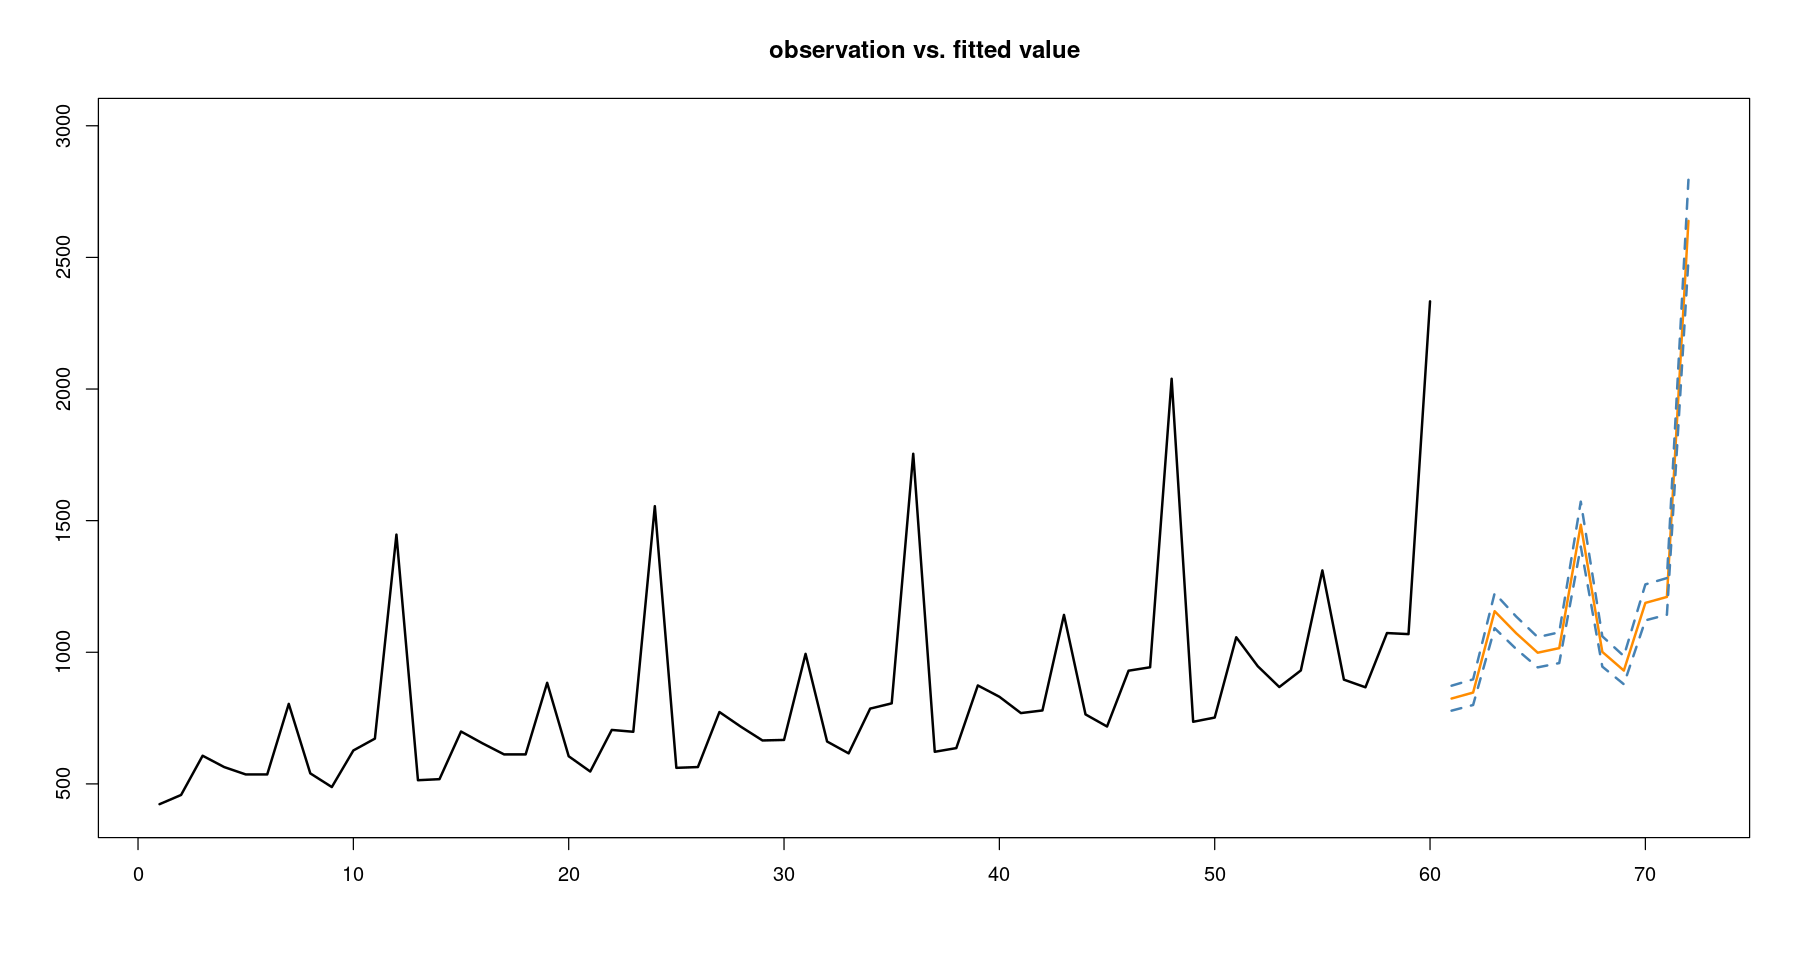

In [153]:
plot(z~tmp.data$trend, tmp.data,
     main = 'observation vs. fitted value',
     xlab="", ylab="",
     xlim=c(1,72),
     ylim=c(400,3000),
     type='l',
     lwd=2)
lines(61:72, predict_result$fitted_dep, col='darkorange', lwd=2)
lines(61:72, predict_result$fitted_dep_l, col='steelblue', lwd=2, lty=2)
lines(61:72, predict_result$fitted_dep_u, col='steelblue', lwd=2, lty=2)